<a href="https://colab.research.google.com/github/jiyeon712/B.D.A/blob/main/%EB%B3%B5%EC%8A%B5_%ED%95%9C%EC%A7%80%EC%97%B087_0114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 다중회귀, 다항회귀

#### 다중회귀
- 특성 여러 개 인것들 변수가 2개 이상되고 3개 4개 이상되면

#### 다항회귀
- 차수를 높이는 개념
- 다항회귀도 선형회귀라고 말을 하는데, 2차 3차 방정식으로 표현되는데, 치환을 통해서 하나의 선형적인 회귀 식으로 만들 수 있다.
- 선형/ 비선형을 나눌 때는 회귀 계수에 따라서 선형인지 비선형인지를 나누게 되는 것


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
boston = pd.read_csv('boston_house.csv')

In [ ]:
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


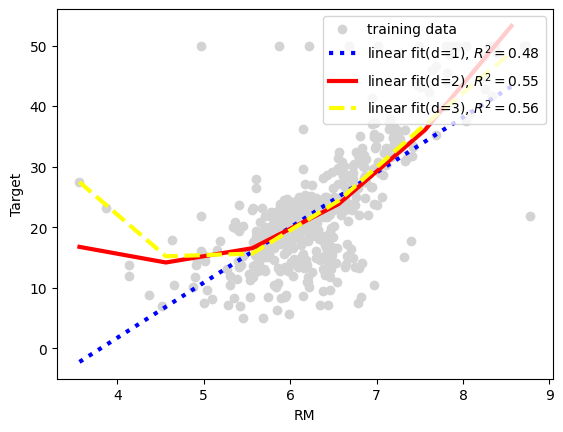

In [ ]:
X = np.array(boston['RM'])
y = np.array(boston['Target'])
X = X.reshape(-1,1)
y = y.reshape(-1,1)

lr = LinearRegression()

#다항회귀
quadrastic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadrastic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

##단순회귀식 계산
X_fit = np.arange(X.min(), X.max(), 1 )[:, np.newaxis]
lr.fit(X,y)
y_lin_fit = lr.predict(X_fit)
l_r2 = r2_score(y, lr.predict(X))

#2차 다항회귀 모델
lr.fit(X_quad,y)
y_quad_fit = lr.predict(quadrastic.fit_transform(X_fit))
q_r2 = r2_score(y, lr.predict(X_quad))

#3차 다항회귀 모델
lr.fit(X_cubic,y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
c_r2 = r2_score(y, lr.predict(X_cubic))

# 그래프 그리기
plt.scatter(X,y, label= 'training data', c = 'lightgray')
plt.plot(X_fit, y_lin_fit, linestyle = ':', label = 'linear fit(d=1), $R^2=%.2f$' %l_r2, c='blue',lw=3)
plt.plot(X_fit, y_quad_fit, linestyle = '-', label = 'linear fit(d=2), $R^2=%.2f$' %q_r2, c='red',lw=3)
plt.plot(X_fit, y_cubic_fit, linestyle = '--', label = 'linear fit(d=3), $R^2=%.2f$' %c_r2, c='yellow',lw=3)

plt.ylabel('Target')
plt.xlabel('RM')
plt.legend(loc=1)
plt.show()

- 과적합이 될 수 있다.
- 조심해야 한다.

- 다항회귀가 변하는 방식

In [ ]:
X = np.arange(4).reshape(2,2)
print('1차 단항삭의 계수 피처 ',X)

# 2차 3차로 바뀌는 방식이 무엇인지를 이해해 보면
# 2차 다항식
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수',poly_ftr)

1차 단항삭의 계수 피처  [[0 1]
 [2 3]]
변환된 2차 다항식 계수 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 단항식은 [X1, X2]
- 2차 다항식으로 바꾸는 것은 기존의 단항식을 가지고 다항계수 변경한다.
- [1, X1, X2, X1**2, X1X2, X2**2]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [ ]:
#임의의 값으로 구성된 x의 값에 대해 코사인 변환 값을 반환
def true_func(X):
    return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_funt()에서 노이즈 변동 값 더한 값

y = true_func(X)+np.random.randn(n_samples)*0.1

Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.
Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232062 입니다.
Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE는 180526263.01880735 입니다.


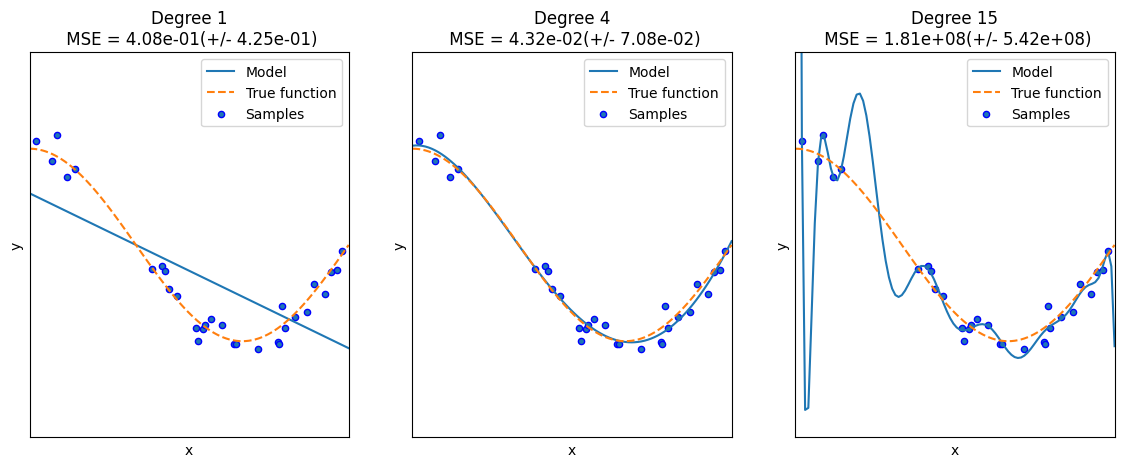

In [ ]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

#다항 회귀의 차수 degree를 변화하면서 비교

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    #개별 degree별로 polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias =False)
    linear_regression = LinearRegression()
    pipeline= Pipeline([('polynomial_features',polynomial_features),
                      ('linear_regression',linear_regression)])

    pipeline.fit(X.reshape(-1,1),y)

    #교차 검증으로 다항 회귀 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    #Pipeline을 구성하는 세부 객체 named_steps 이용해 회귀 계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('Degree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    #0 부터 1까지 테스트 데이터 세트를 100개로 나눠서 예측 수행
    # 테스트 데이터 세트에 호귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    #실제값 곡선
    plt.plot(X_test, true_func(X_test),'--',label='True function')
    plt.scatter(X,y, edgecolor='b', s=20, label='Samples')

    plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\n MSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 좋은 예측 모델은 너무 설명하지 못하는 것도 아니고 , 과적합도 아닌 적절한 수준의 밸런스가 필요하다.
- 1차를 설명력이 높다 볼 수 없고, 15차를 과적합이 된 것이 보이고 -> 4차 정도 수준에서 놓치는 부분은 있지만 과적합되지 않고 최대한 설명할 수 있는

## 규제
- 선형회귀 분석을 통해서 실제값과 예측값에 대한 차이를 MSE,RMSE를 가지고 최적의 모델을 찾기 위해 노력했다.
- 최대한 선형 모델의 비용함수 값이 가장 낮은 값을( 최소화 ) 값을 찾기 위해서 노력했는데.
- 그러다 보니 문제가 발생할 수 있다.
- 학습 데이터에 너무 지나치게 맞추게 되면, 회귀 계수 값이 상딩히 큰 값들이 발생한다.
- 이런 경우는 오히려 실제 테스트 데이터에 성능이 저하될 수 있기 때문에
- 이 부분을 방지하기 위해서 규제를 가한다.

- 회귀 분석에서 생각하는 비용함수
- 비용함수 = 학습데이터 잔차의 오류를 최소화 + 회귀계수의 크기를 제어하는 것

- 규제라는 것이
- 비용함수 = Min(RSS(W)) + alpha*||W||

- 우리가 전에 배웠던 것은 Min(RSS(W)) 최소화 하는 것
- 지금 배우는 규제는 alpha*||W|| 회귀 계수에 대한 규제


- alpha 흔히 말하는 학습 데이터 적합 정도와 회귀 계수 크기를 제어하는 파라미터 ( 튜닝 )
- 최적의 최소하하는 W 벡터를 찾는 것이다.

- alpha  * W

- 최소화 하기위해서는 alpha 작은 값이면  최소화 되는 것
- alpha 값이 큰 값이라면 W 값을 작은 값으로 조정하게 되면 최소화 되는 것

- 비용함수에 alpha 값으로 패널티를 부여해서 회귀 계수의 값의 크기를 감소시켜 과소적합하는 방식이 규제

- L2, L1 방식
- L2 는 W의 제곱에 패널티를 부여하는 방식 릿지
- L1 는 W 절대값에 패널티를 부여하는 형태로 라쏘
- L1+L2 형식으로 합쳐진 게 엘라스틱넷

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets
import numpy as np

In [ ]:
#데이터 분할
y = np.array(boston['Target'])
X = boston.drop(['Target'], axis=1, inplace=False)

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

#회귀식
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds= lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
lr_rmse= np.sqrt(mse)

# 일반 cross_val
lr_neg_mse_scores = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error',cv=5)
lr_rmse_scores = np.sqrt(-1*lr_neg_mse_scores)
lr_avg_rmse = np.mean(lr_rmse_scores)


# 릿지
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('선형회귀', lr_avg_rmse)
print('릿지',avg_rmse)

선형회귀 4.9657452581036665
릿지 5.0062660113024995


In [ ]:
# alpha 파라미터값을 조정해서 바꿔보자

alphas = [0,0.1, 1, 10, 100]

# alpha 리스트 평균 rmse

for alpha in alphas:
    ridge=Ridge(alpha= alpha)
    #cross val score cv 5 RMSE
    neg_mse_scores = cross_val_score(ridge,X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 4.966
alpha 0.1일 때 5 folds의 평균 RMSE : 4.966
alpha 1일 때 5 folds의 평균 RMSE : 4.984
alpha 10일 때 5 folds의 평균 RMSE : 5.006
alpha 100일 때 5 folds의 평균 RMSE : 5.071


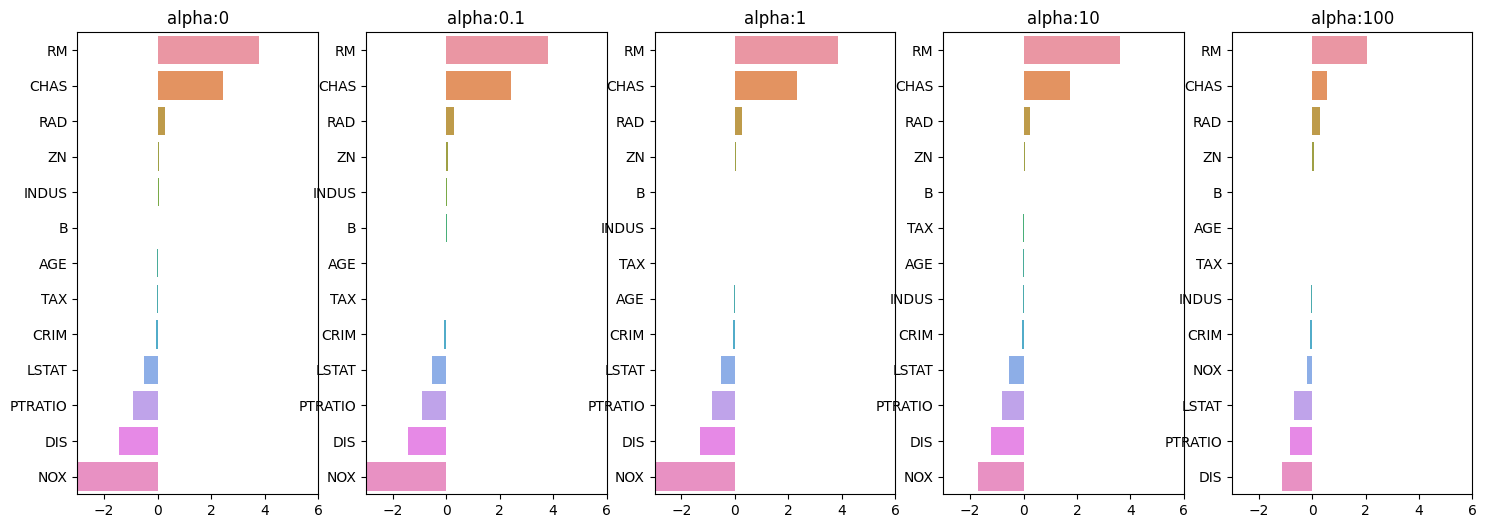

In [ ]:
# 각 alpha에 따른 회귀 계수 값을 시각하기 위해 5개 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하는 데이터 프레임

coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha= alpha)
    ridge.fit(X_train, y_train)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_train.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname]= coeff
    #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [ ]:
ridge_alphas = [0, 0.1,1,10,100]
sort_columns = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.808368,3.818017,3.849444,3.612711,2.042059
CHAS,2.452340,2.434932,2.318485,1.739668,0.557144
RAD,0.274837,0.271036,0.253331,0.244921,0.287957
ZN,0.051475,0.051368,0.050949,0.052115,0.057974
INDUS,0.039759,0.034274,0.007804,-0.020697,-0.026732
B,0.010848,0.010942,0.011393,0.011740,0.010656
AGE,-0.008769,-0.009893,-0.015209,-0.018881,-0.005857
TAX,-0.012074,-0.012137,-0.012473,-0.013367,-0.015218
CRIM,-0.074834,-0.073915,-0.069648,-0.067775,-0.077626
LSTAT,-0.514497,-0.515804,-0.523297,-0.551684,-0.663934


- alpha값이 증가하면서 회귀 계수가 지속적으로 작아지고 있는 것
- 하지만 릿지 회귀 계수를 0으로 만들지는 않는다.
- 회귀 계수를 0으로 만든다는 것은 결국 그 변수는 뺀다는 듯 ( 라쏘 0으로 만든다.)

### 라쏘회귀
- W의 절대값에 패널티를 부여한다. L1 선형회귀 규제 방식이 라쏘
- 불필요한 변수는 회귀계수를 급격하게 0으로 만들어서 제거 시킨다.

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DF 변환
def get_linear_reg_eval(model_name, params = None, X_data_n =None, y_target_n=None,
                       verbose= True, return_coeff=True):
    coeff_df =pd.DataFrame()
    if verbose : print('######', model_name,'#######')
    for param in params:
        if model_name =='Ridge' : model = Ridge(alpha=param)
        elif model_name =='Lasso' : model = Lasso(alpha=param)
        elif model_name =='ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                        y_target_n, scoring= 'neg_mean_squared_error',cv= 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        #cross_val_score 는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n, y_target_n)
        if return_coeff:
            #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼 추가
            coeff = pd.Series(data=model.coef_, index =X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df



In [ ]:
# 라쏘에 사용될 alpha 파라미터 값 정의
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params= lasso_alphas, X_data_n =X_train, y_target_n= y_train)

###### Lasso #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 5.050
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.047
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 5.063
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.312
alpha 3 일 때 5 폴드 세트의 평균 RMSE : 5.857


In [ ]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DF 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.773837,3.686930,2.365530,0.724296,0.000000
CHAS,1.327519,0.892495,0.000000,0.000000,0.000000
RAD,0.234742,0.239303,0.239361,0.224885,0.042215
ZN,0.050790,0.051211,0.051336,0.049171,0.031078
B,0.012064,0.012062,0.011082,0.009705,0.007720
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
TAX,-0.013564,-0.013912,-0.014159,-0.013457,-0.006660
INDUS,-0.015733,-0.009348,-0.000000,-0.000000,-0.000000
AGE,-0.019998,-0.018498,-0.002272,0.010116,0.026390
CRIM,-0.062218,-0.062068,-0.048879,-0.029694,-0.000000


### 엘라스틱넷 회귀
- L2규제 + L1규제 결합하는 것
- 최소화하는 것
- 라쏘회귀가 서로 상관관계가 높은 피처는 이 중에서 중요 피처한 선택하고 나머지는 회귀계수 0으로
- 이런 성향 alpha갑셍 따라 회귀 계수가 급 변동할 수 있는데 완화하는 형식이 L2규제


In [ ]:
#엘라스틱넷에 사용될 alpha 파라미터 값 정의하고 함수 도출
# l1_ratio는 0.7로 고정

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params = elastic_alphas,
                                      X_data_n = X_train, y_target_n = y_train)

###### ElasticNet #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 5.029
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.027
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 5.092
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.257
alpha 3 일 때 5 폴드 세트의 평균 RMSE : 5.729


In [ ]:
sort_columns = 'alpha:'+ str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_columns, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.542407,3.373660,1.814472,0.832027,0.000000
CHAS,1.264424,0.947394,0.000000,0.000000,0.000000
RAD,0.242815,0.248657,0.268553,0.248960,0.113653
ZN,0.052149,0.052897,0.055578,0.051957,0.032290
B,0.011872,0.011779,0.010610,0.009758,0.008523
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
TAX,-0.013783,-0.014102,-0.015224,-0.014384,-0.009190
AGE,-0.018629,-0.016791,-0.000000,0.009266,0.028047
INDUS,-0.019680,-0.016242,-0.000000,-0.000000,-0.000000
CRIM,-0.065232,-0.065836,-0.060007,-0.044251,-0.000000


In [ ]:
#mehtod는 표준 정규 분포 변환( Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
#p_degree는 다항식 특성 추가할 때 적용, p_degree는 2이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method =='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method =='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method =='Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree !=None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias =False).fit_transform(scaled_data)

    return scaled_data


In [ ]:
#Ridged의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환, 먼저 원본 그대로, 표준정규 분포, 표준정규 분포 +다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그변환 등 자유롭게 조절 가능
scale_methods =[(None, None),('Standard',None),('Standard',2),
               ('MinMax',None),('MinMax',2)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data =X_train)

    print('\n## 변환 유형 :{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params= alphas, X_data_n = X_data_scaled,
                       y_target_n = y_train, verbose=False, return_coeff =False)


## 변환 유형 :None, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 0.101
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 0.104
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 0.136
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 0.205

## 변환 유형 :Standard, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 0.101
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 0.104
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 0.136
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 0.205

## 변환 유형 :Standard, Polynomial Degree:2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 0.197
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 0.141
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 0.148
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 0.157

## 변환 유형 :MinMax, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 0.109
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 0.136
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 0.222
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 0.391

## 변환 유형 :MinMax, Polynomial Degree:2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 0.128
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 0.125
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 0.153
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 0.287


## 다중공선성 Variance inflation factor (VIF)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import default_rng
rng = default_rng()
# set the RNG seed in case we wish to test the stability of our predictions
np.random.seed(8)

In [ ]:
df               = pd.DataFrame(np.arange(0,100,0.5), columns=["mph"])
df['kmph']       = df['mph'] * 1.609344
df['n_unicorns'] = np.random.randint(low= 1, high=  4, size=df.shape[0])
df['RNG']        = np.random.uniform(low= 0, high= 50, size=df.shape[0])
# we shall also add a little Gaussian noise to the target
df['fuel']       = df['mph'] * (1 + np.random.normal(0,0.02, size=df.shape[0]))
X = df.iloc[:,[0,1,2,3]]
y = df.iloc[:,[4]]
# take a look
df

,mph,kmph,n_unicorns,RNG,fuel
0,0.0,0.000000,1,18.378527,0.000000
1,0.5,0.804672,2,12.032513,0.490364
2,1.0,1.609344,2,2.411589,0.997131
3,1.5,2.414016,2,8.758339,1.513638
4,2.0,3.218688,3,27.838772,1.961464
...,...,...,...,...,...
195,97.5,156.911040,2,13.968118,95.976657
196,98.0,157.715712,3,48.608956,98.747284
197,98.5,158.520384,1,16.558214,99.661694
198,99.0,159.325056,3,48.056735,100.566006


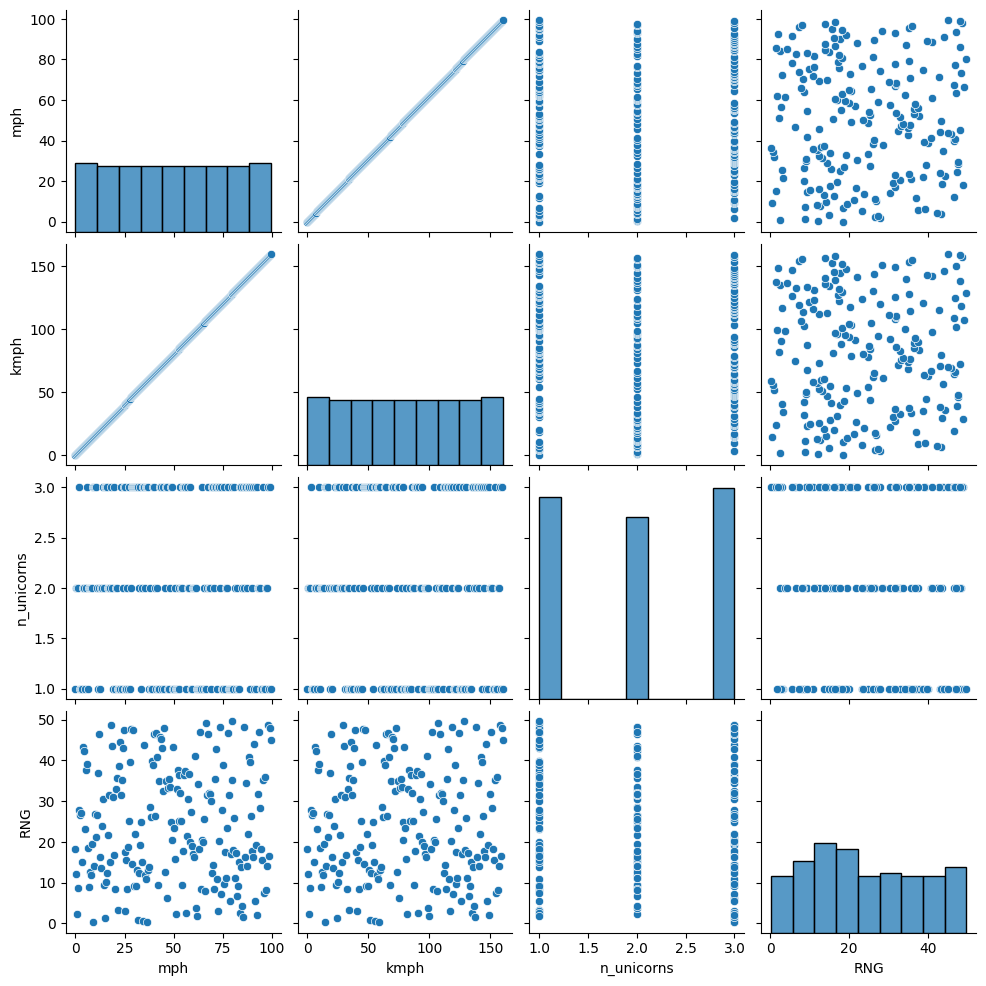

In [ ]:
sns.pairplot(X);

In [ ]:
# using scikit-learn
from sklearn import linear_model
regression = linear_model.LinearRegression()
# ground truth: X=mph, y=fuel
regression.fit(df.iloc[:,[0]] , df.iloc[:,[4]])
print("Ground truth regression coefficient:",regression.coef_)
print()

# full regression, this time using statsmodels
import statsmodels.api as sm
model   = sm.OLS(y,X)
results = model.fit()
print(results.summary())

Ground truth regression coefficient: [[0.99984436]]

                                 OLS Regression Results                                
Dep. Variable:                   fuel   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.604e+05
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                        0.00
Time:                        13:05:35   Log-Likelihood:                         -314.18
No. Observations:                 200   AIC:                                      634.4
Df Residuals:                     197   BIC:                                      644.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF             = pd.DataFrame()
VIF['feature']  = X.columns
VIF['VIF']      = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# take a look
VIF

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,mph,inf
1,kmph,inf
2,n_unicorns,3.507853
3,RNG,2.986786


In [ ]:
X = X.drop(['kmph'], axis=1)

VIF            = pd.DataFrame()
VIF['feature'] = X.columns
VIF['VIF']     = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF

,feature,VIF
0,mph,3.054533
1,n_unicorns,3.507853
2,RNG,2.986786


In [ ]:
results = sm.OLS(y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   fuel   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.604e+05
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                        0.00
Time:                        13:08:54   Log-Likelihood:                         -314.18
No. Observations:                 200   AIC:                                      634.4
Df Residuals:                     197   BIC:                                      644.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
df["Maker"] = np.random.choice(a=["Porsche","Jaguar"], size=200, p=[0.5,0.5] )

# take a look
df

,mph,kmph,n_unicorns,RNG,fuel,Maker
0,0.0,0.000000,1,18.378527,0.000000,Jaguar
1,0.5,0.804672,2,12.032513,0.490364,Porsche
2,1.0,1.609344,2,2.411589,0.997131,Jaguar
3,1.5,2.414016,2,8.758339,1.513638,Porsche
4,2.0,3.218688,3,27.838772,1.961464,Porsche
...,...,...,...,...,...,...
195,97.5,156.911040,2,13.968118,95.976657,Jaguar
196,98.0,157.715712,3,48.608956,98.747284,Jaguar
197,98.5,158.520384,1,16.558214,99.661694,Porsche
198,99.0,159.325056,3,48.056735,100.566006,Porsche


In [ ]:
df = pd.get_dummies(df)

# take a look
df['Maker_Jaguar'] = df['Maker_Jaguar'] *1
df['Maker_Porsche'] = df['Maker_Porsche'] *1

In [ ]:
VIF = pd.DataFrame()
X = df.iloc[:,[0,2,3,5,6]]
VIF['feature'] = X.columns
VIF['VIF']     = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF

,feature,VIF
0,mph,1.002146
1,n_unicorns,1.008455
2,RNG,1.008250
3,Maker_Jaguar,7.642070
4,Maker_Porsche,6.761384


### Kaggle code 탐색

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox

In [ ]:
df = pd.read_csv('car data.csv')

"Selling_Price" will be the dependent variable and the rest of the variables will be considered as independent variables.

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.describe(include='number')


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.describe(include='object')


,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


Step 4.1: Feature Subset Selection

In [ ]:
df['Car_Name'].nunique()


98

In [ ]:
df.drop('Car_Name', axis=1, inplace=True)


In [ ]:
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


Step 4.3: Outlier Detection


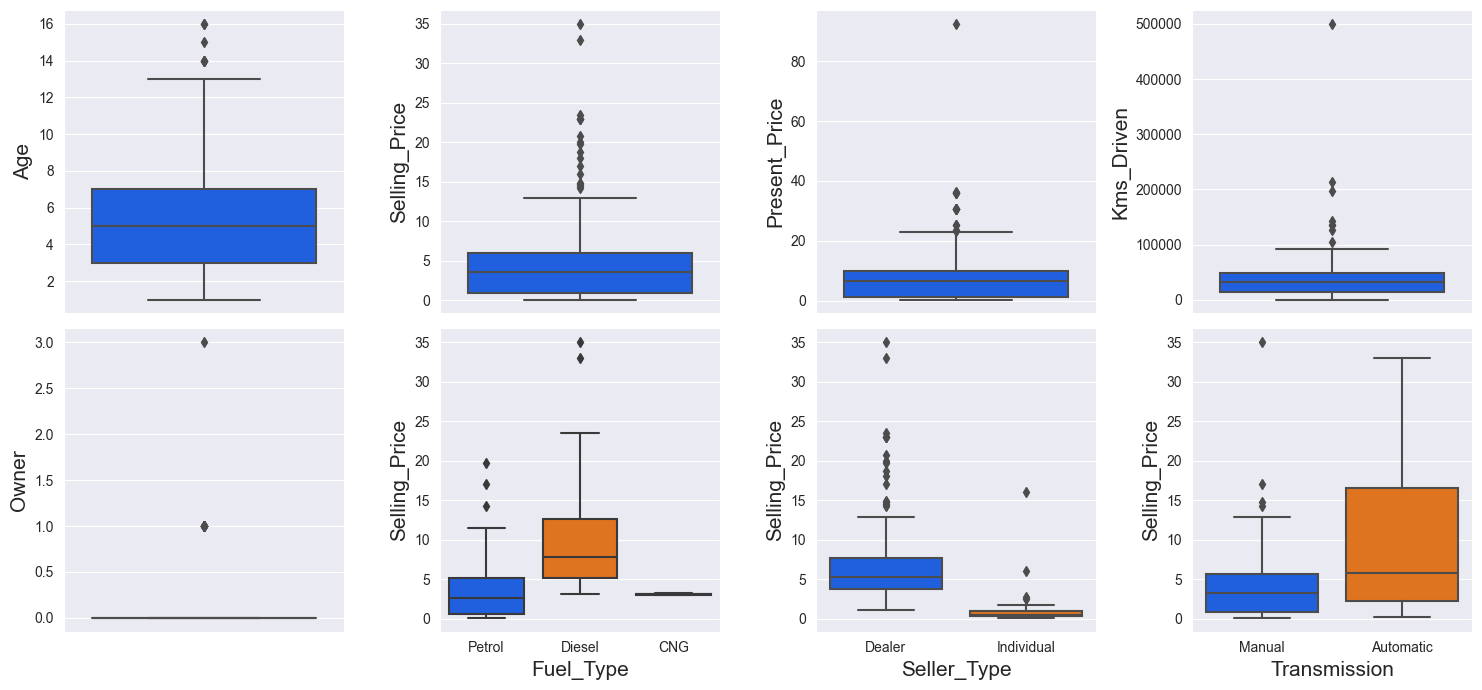

In [ ]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,
                              df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='Selling_Price', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

As can be seen from the boxplots above, there are outliers in the dataset. We will identify the outliers based on the InterQuartile Range rule:

In [ ]:
outliers_indexes = []
target = 'Selling_Price'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())


for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


It is not acceptable to drop an observation just because it is an outlier. They can be legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not. We are allowed to delete outliers in two cases:

Outlier is due to incorrectly entered or measured data
Outlier creates a significant association

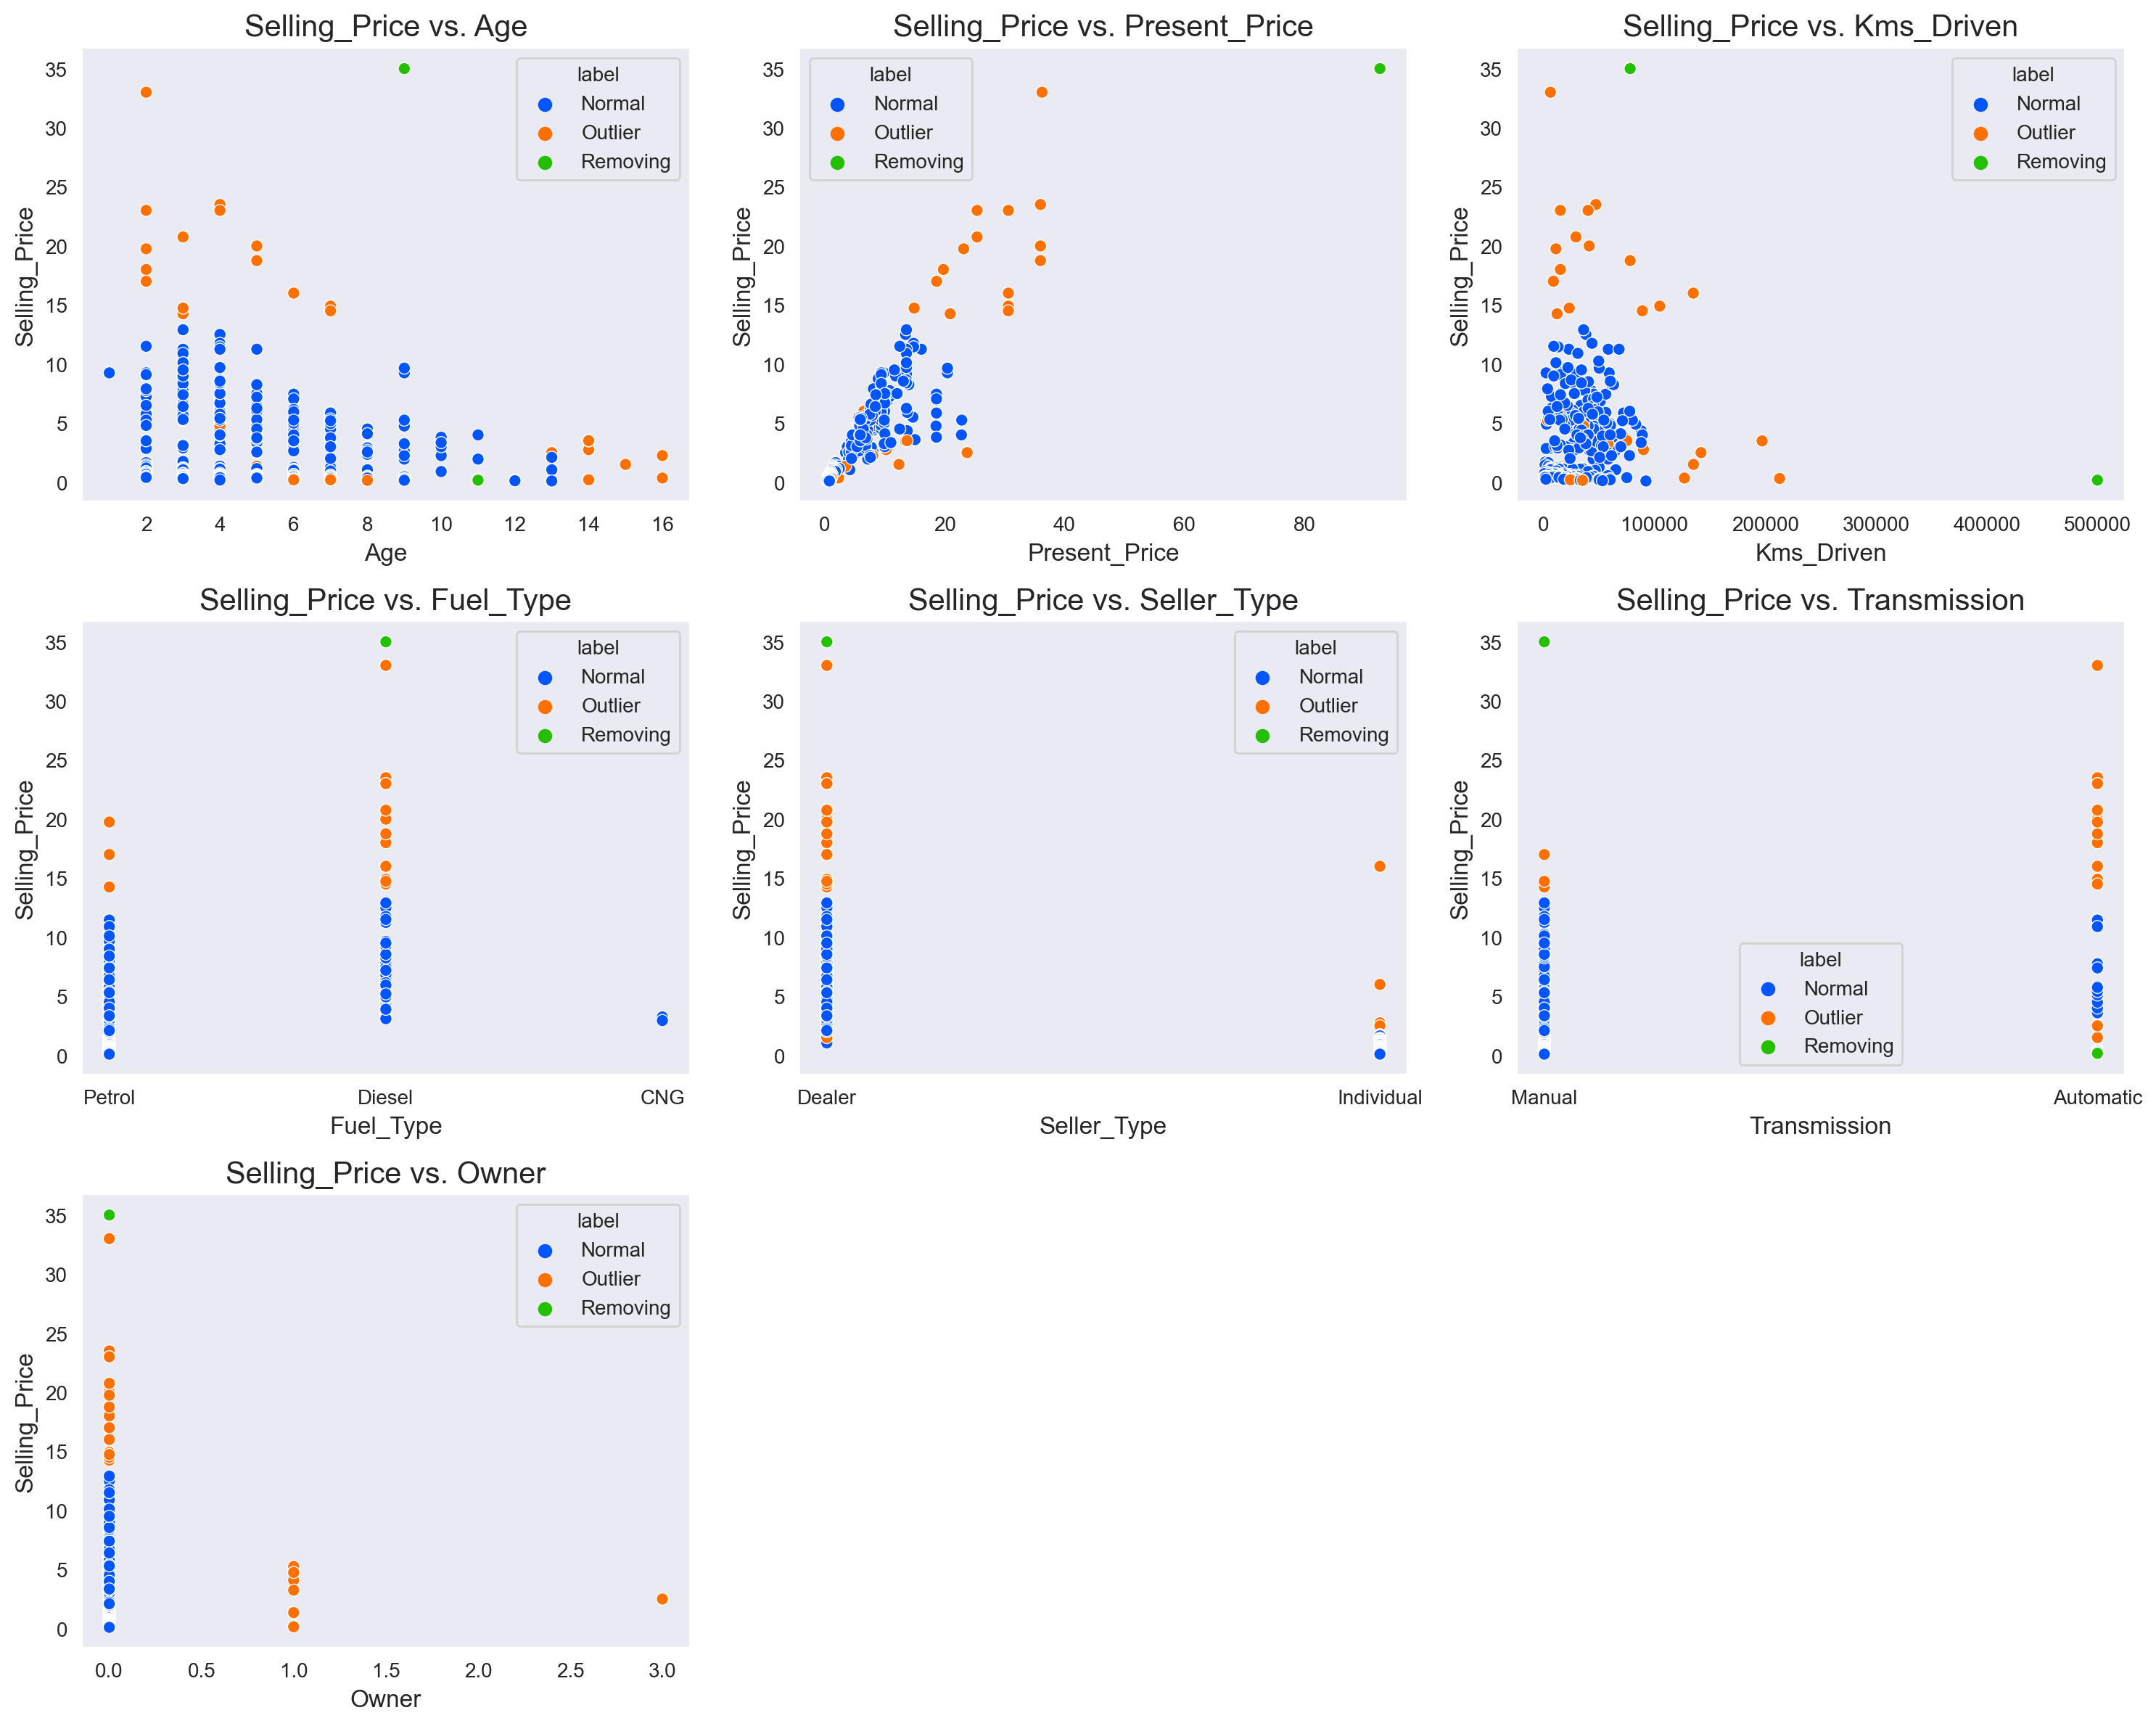

In [ ]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['Kms_Driven']>400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
target = 'Selling_Price'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

In [ ]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Step 4.5: Discover Duplicates¶

In [ ]:
df[df.duplicated(keep=False)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


Step 4.6: Drop Outliers


In [ ]:
df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

We removed just two samples as outliers.



Step 5: EDA


Step 5.1: Categorical Variables Univariate Analysis


In [ ]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']


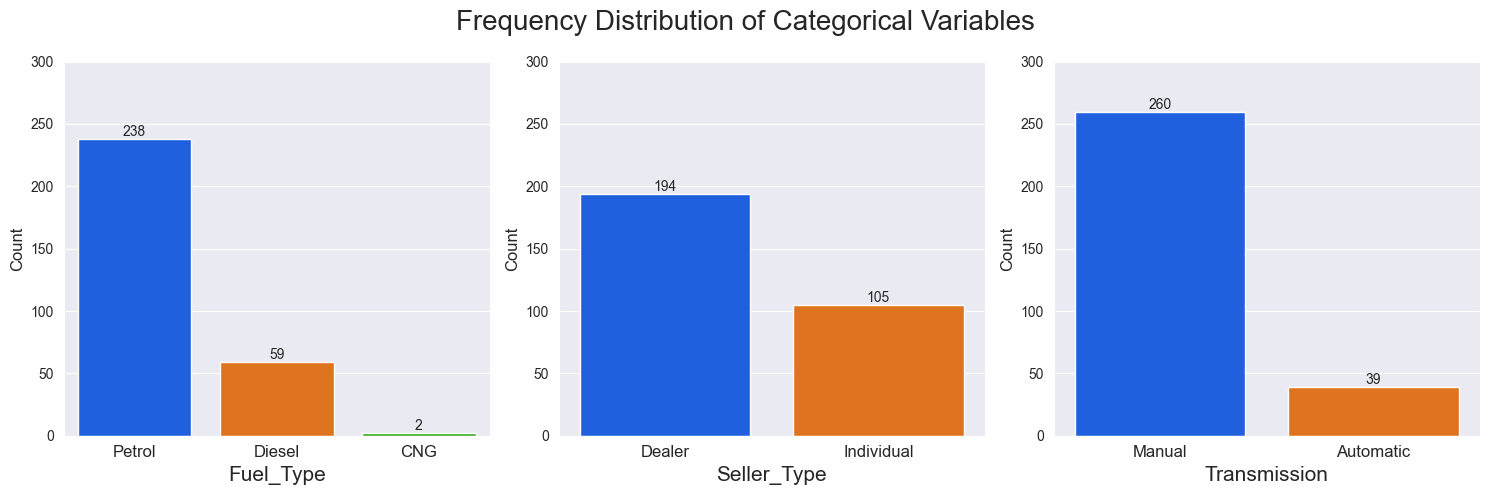

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

for i in range(len(CatCols)):
    graph = sns.countplot(x=CatCols[i], data=df1, ax=ax[i])
    ax[i].set_xlabel(CatCols[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,300])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    for cont in graph.containers:
        graph.bar_label(cont)

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20)
plt.tight_layout()
plt.show()

Conclusion:
There are 3 Fuel_Type categories. Petrol has the highest frequency and CNG has the least frequency.
There are 2 Seller_Type categories. Dealer has the highest frequency and Individual has the least frequency.
There are 2 Transmission categories. Manual has the highest frequency and Automatic has the least frequency.

Step 5.2: Numerical Variables Univariate Analysis¶


In [ ]:
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


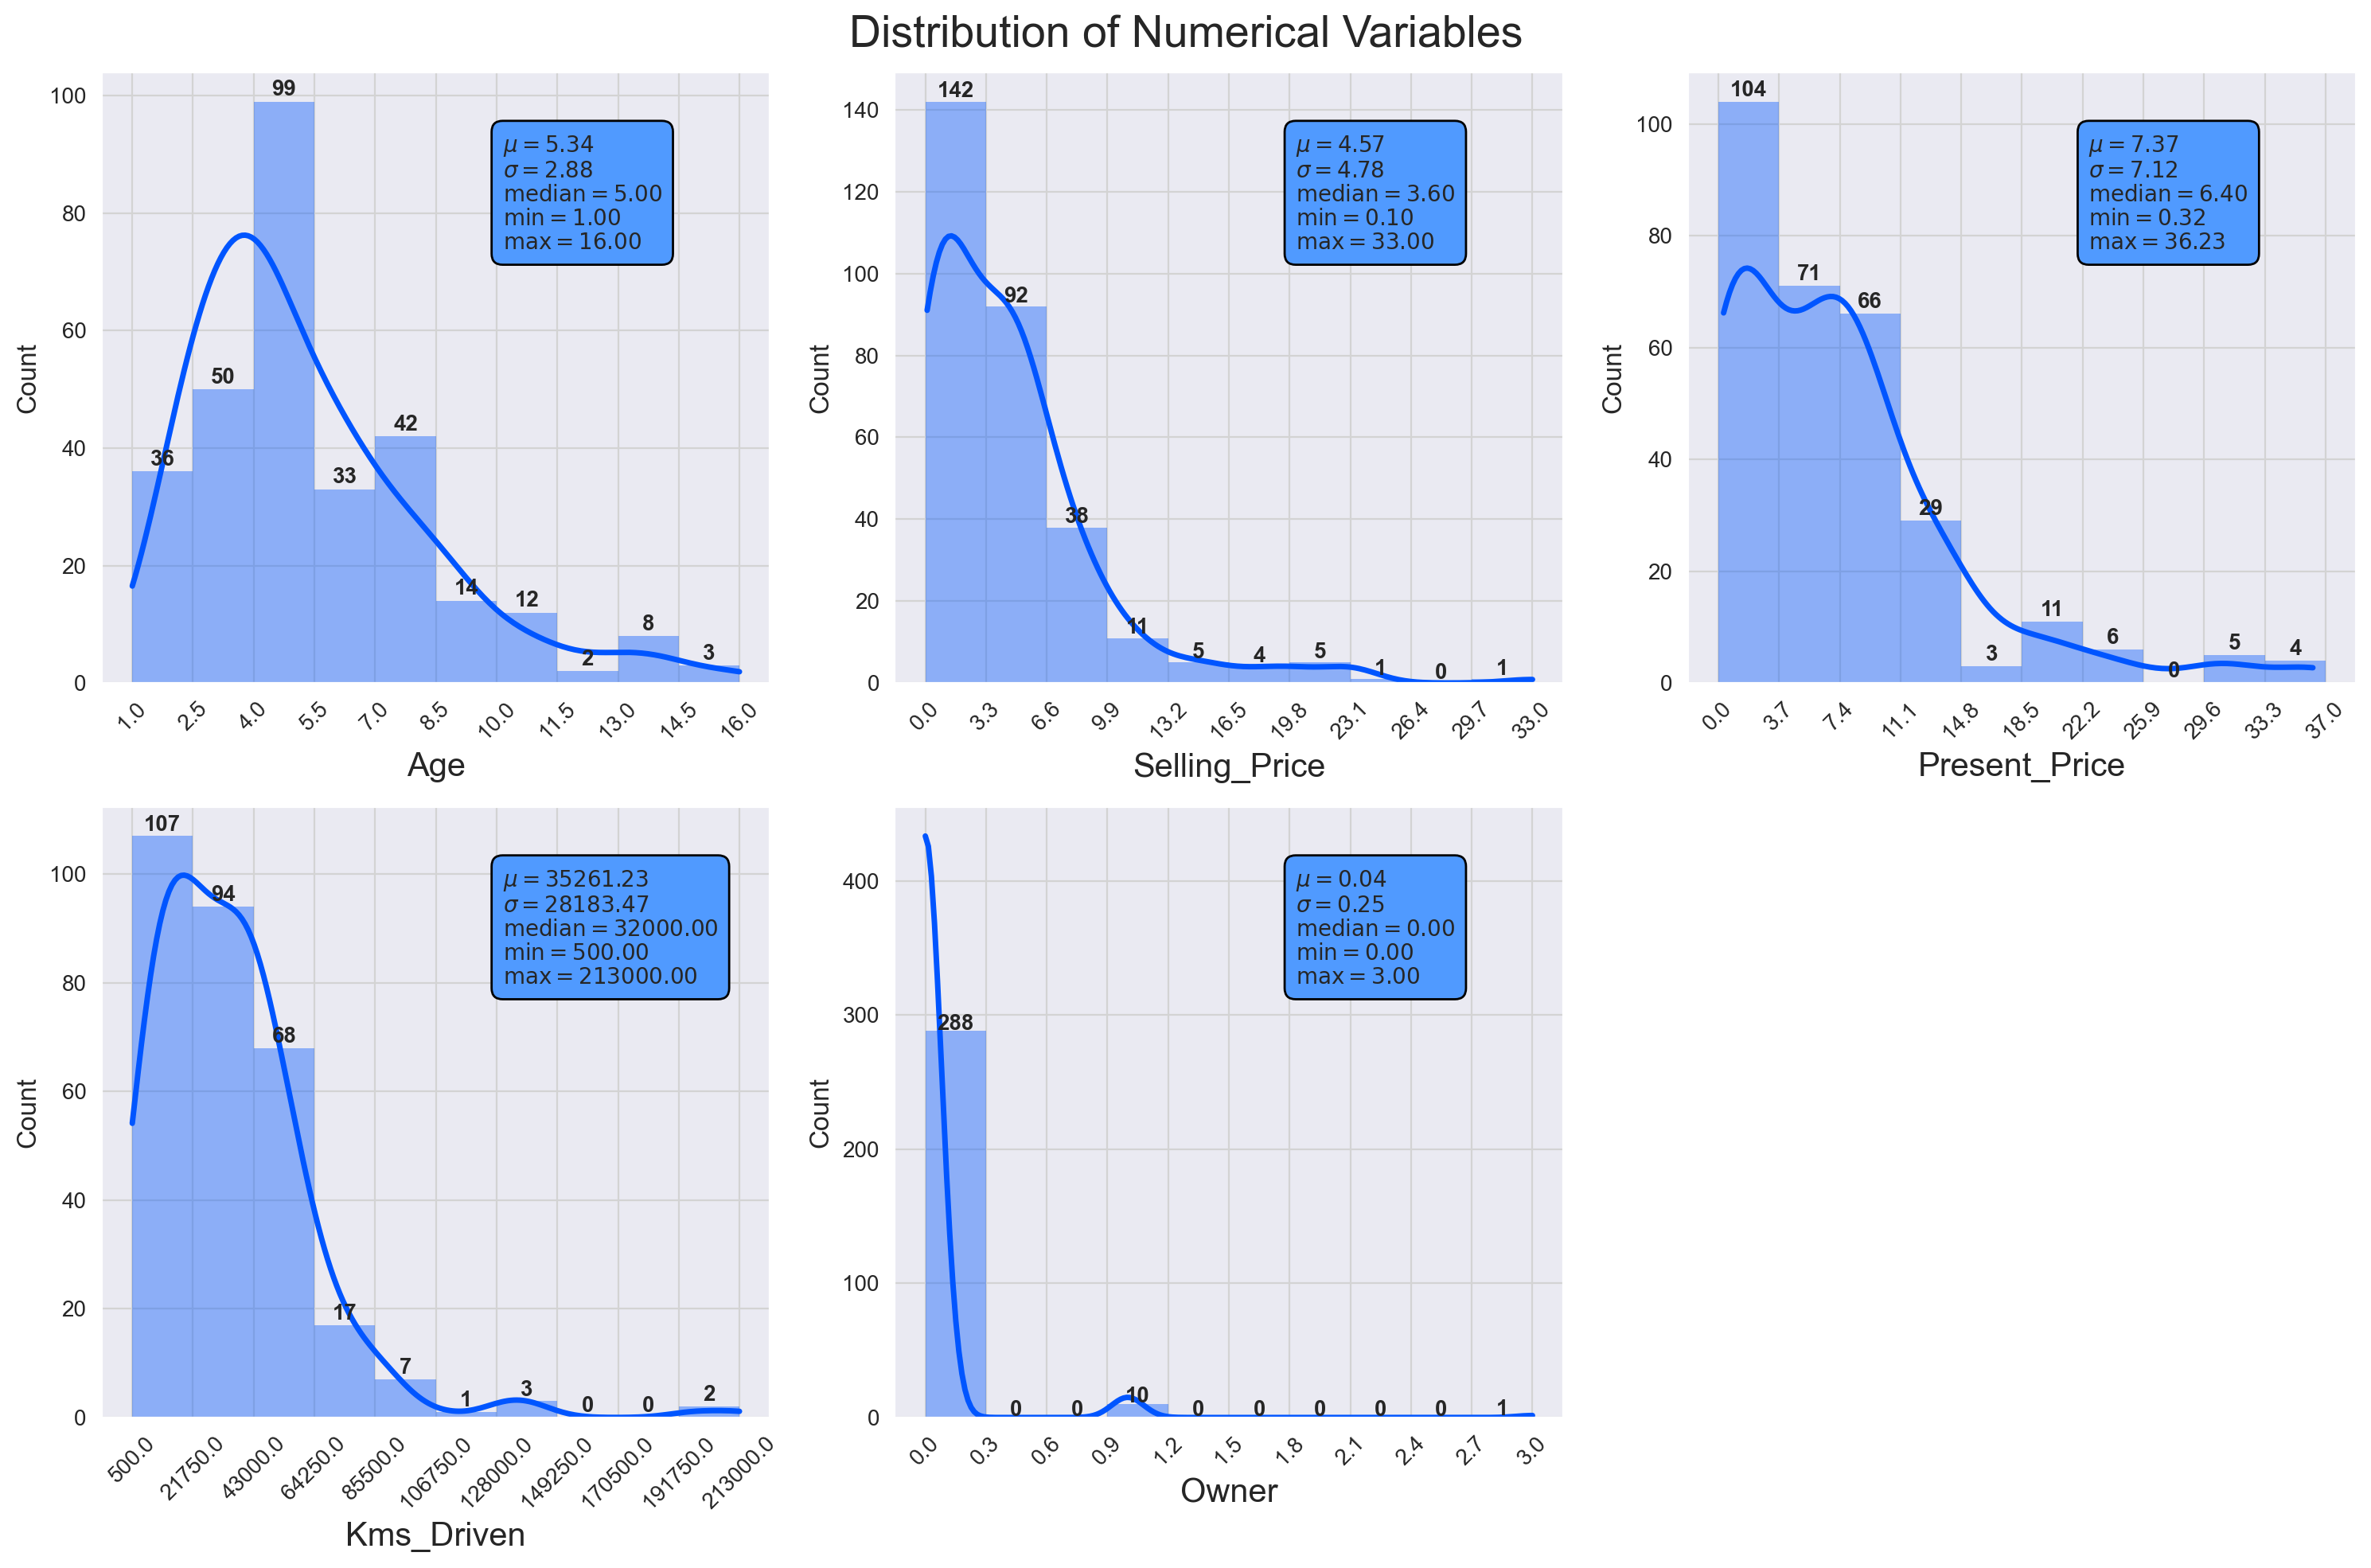

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'

for i in range(len(NumCols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df1[NumCols[i]],
                                     range=(np.floor(df1[NumCols[i]].min()), np.ceil(df1[NumCols[i]].max())))
    graph = sns.histplot(data=df1, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %df1[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %df1[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[NumCols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show()


Step 5.3: Target vs. Numerical Features Bivariate Analysis

Plot Selling_Price vs. numerical features:



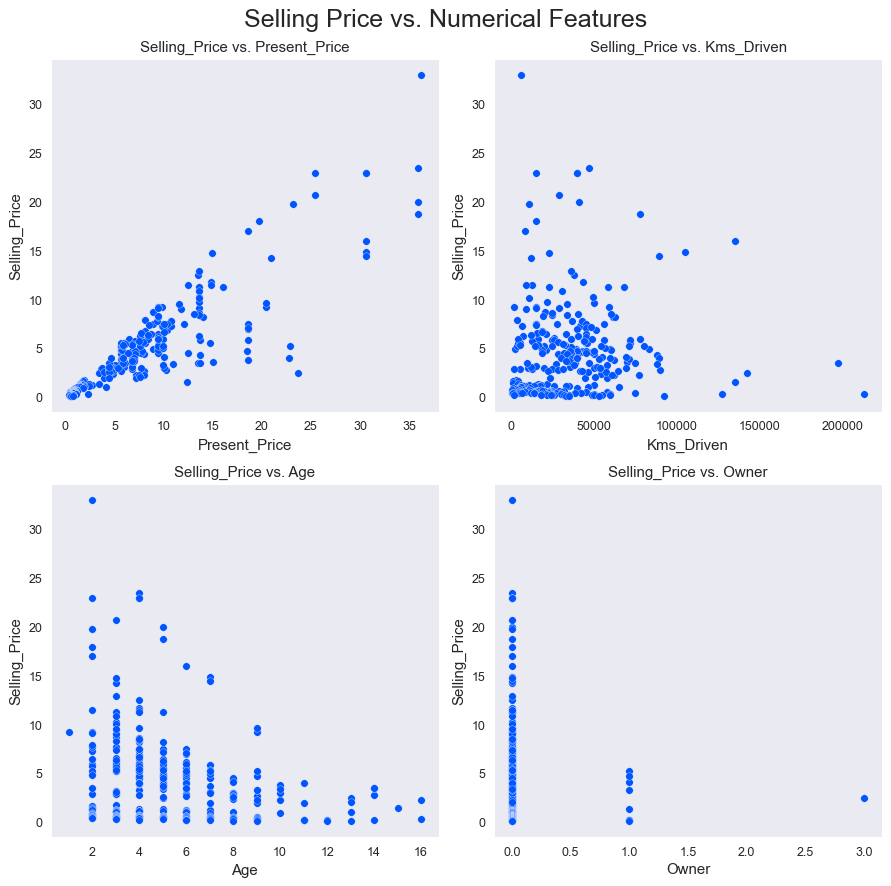

In [ ]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

Conclusion:
As Present_Price increases, Selling_Price increases as well. So Selling_Price is directly proportional to Present_Price.

As the car's Kms_Driven increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Kms_Driven.

As the car ages, its Selling_Price decreases. So Selling_Price is inversely proportional to the Age of the car.

As the number of previous car owners increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Owner.

Step 5.4: Target vs. Categorical Features Bivariate Analysis¶

Selling_Price vs. categorical features strip plots:



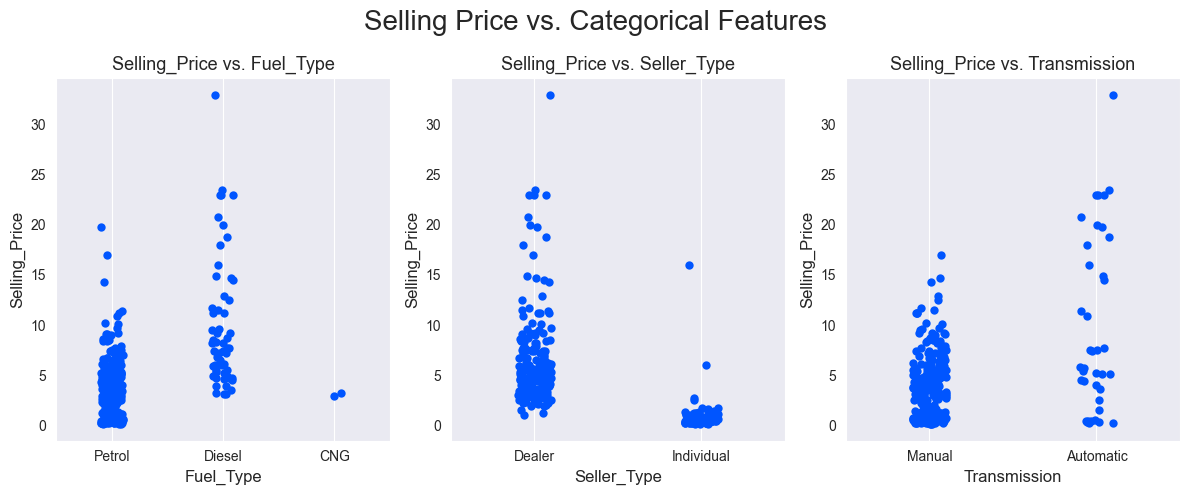

In [ ]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

Conclusion:
Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.
The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.
Automatic cars are more expensive than manual c

Step 5.5: Multivariate Analysis¶


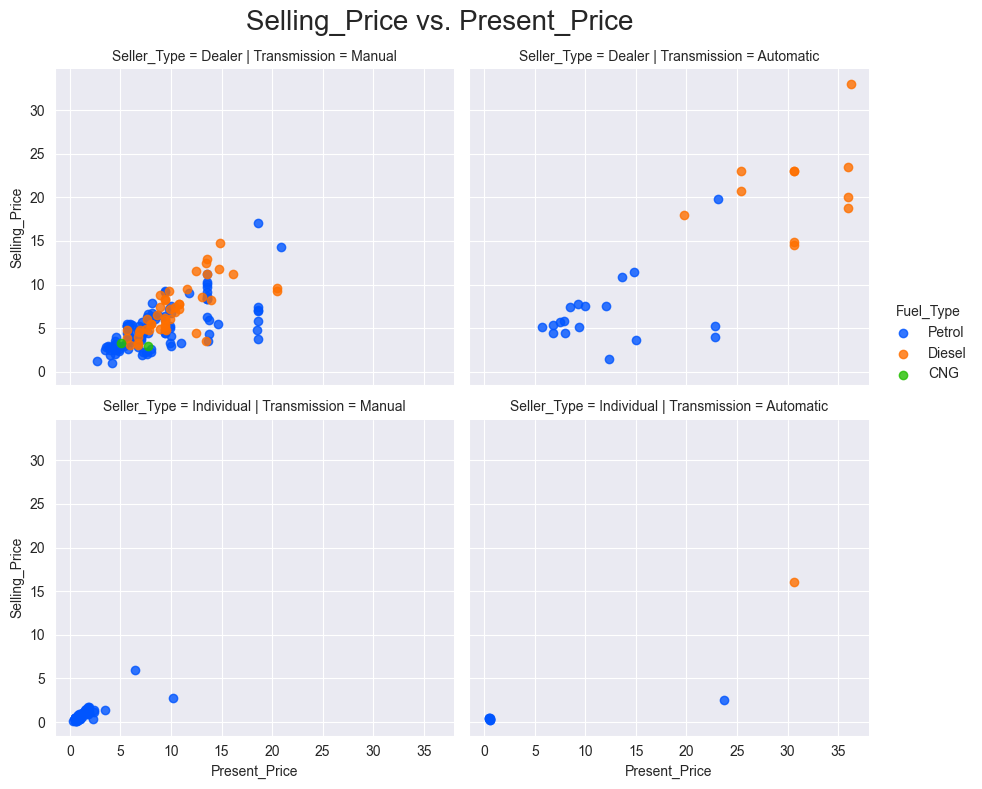

In [ ]:
graph = sns.lmplot(x='Present_Price', y='Selling_Price', data= df1, fit_reg=False, row='Seller_Type',
                   col='Transmission', hue='Fuel_Type', palette=CustomPalette, height=4, aspect=1)

plt.suptitle('Selling_Price vs. Present_Price', fontsize=20)
sns.move_legend(graph, "lower center", bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.tight_layout()
plt.show()

Conclusion:
All of the Individual Seller_Type have had Petrol cars.
Diesel cars all have belonged to the Dealer Seller_Type.
All of the CNG cars have had Manual Transmission and have belonged to Dealer Seller_Type.

Step 6: Categorical Variables Encoding
We implement dummy encoding on categorical columns, since they are all nominal variables:

In [ ]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df1 = pd.get_dummies(df1, columns=CatCols, drop_first=True)
df1.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,False,True,False,True
1,6,4.75,9.54,43000,0,True,False,False,True
2,2,7.25,9.85,6900,0,False,True,False,True
3,8,2.85,4.15,5200,0,False,True,False,True
4,5,4.60,6.87,42450,0,True,False,False,True


Step 7: Correlation Analysis¶


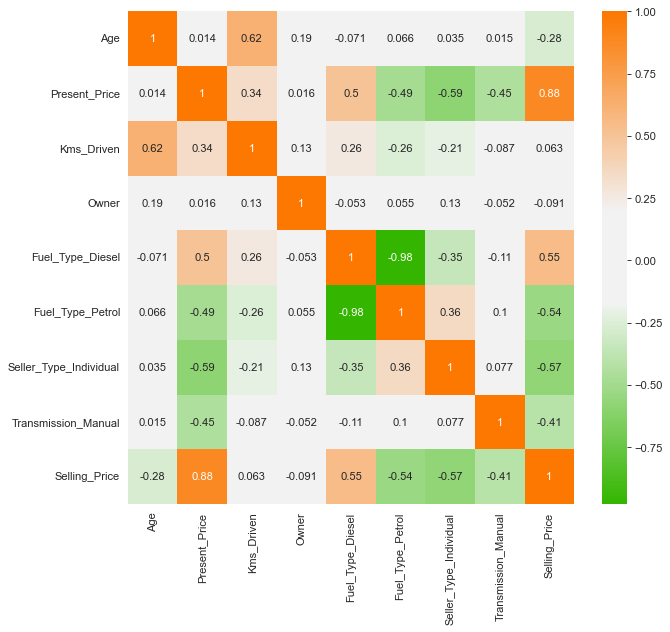

In [ ]:
target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

The target variable "Selling Price" is highly correlated with Present_Price & Seller_Type & Fuel_Type.
Some independent variables like Fuel_Type_Petrol and Fuel_Type_Disel are highly correlated, which is called Multicollinearity.

Step 8: Build Linear Regression Model¶

Step 8.1: Determine Features & Target Variables¶


In [ ]:
X = df1.drop('Selling_Price', axis=1)
y = df1['Selling_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (209, 8)
X_test shape:  (90, 8)
y_train shape:  (209,)
y_test shape:  (90,)


In [ ]:
y_test_actual = y_test


Step 8.3: Scale Data using Standard Scaler


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

It is very important that StandardScaler transformation should only be learnt from the training set, otherwise it will lead to data leakage.



Step 8.4: Train the Model¶


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_),
             index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,4.302488
Present_Price Coef.,3.492729
Fuel_Type_Diesel Coef.,0.850217
Fuel_Type_Petrol Coef.,0.207319
Transmission_Manual Coef.,0.027375
Owner Coef.,-0.232722
Seller_Type_Individual Coef.,-0.377334
Kms_Driven Coef.,-0.589672
Age Coef.,-0.936339


Step 8.5: Model Evaluation


In [ ]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [ ]:
model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')


,Linear Reg.
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2-Score,0.887245


Step 8.6: Model Evaluation using Cross-Validation¶
By using cross-validation, we can have more confidence in our estimation for the model evaluation metrics than the former simple train-test split:

In [ ]:
linear_reg_cv = LinearRegression()
scaler = StandardScaler()
pipeline = make_pipeline(StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,1.154774,0.147377
MSE,3.131755,1.314319
RMSE,1.728702,0.378609
R2-Score,0.855703,0.033720


The linear regression model obtained R2-score of %85.57 using 6-fold cross-validation.

Pipeline is a great way to prevent data leakage as it ensures that the appropriate method is performed on the correct data subset. This is ideal for using in cross-validation since it ensures that only the training folds are used when performing fit and the test set (validation set) is used only for calculating the accuracy score in each iteration of cross-validation.

Step 8.7: Assumptions
We need to check the assumptions of linear regression, because if the assumptions are not met, the interpretation of the results will not always be valid:

Step 8.7.1: Assumption 1 - Linearity
This assumes that there is a linear relationship between the independent variables or features and the dependent variable or label. Fitting a linear model to data with non-linear patterns results in serious prediction errors, because our model is underfitting.

To detect nonlinearity, we can check:

Plots of actual vs. predicted values -> The desired outcome is that points are symmetrically distributed around a diagonal line
Plots of residuals vs. predicted values -> The desired outcome is that points are symmetrically distributed around a horizontal line
In both cases we should have an almost constant variance.

In [ ]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

In [ ]:
def linear_assumption(model, X_test, y_test):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    '''
    df_results = residuals(model, X_test, y_test)

    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)

    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)

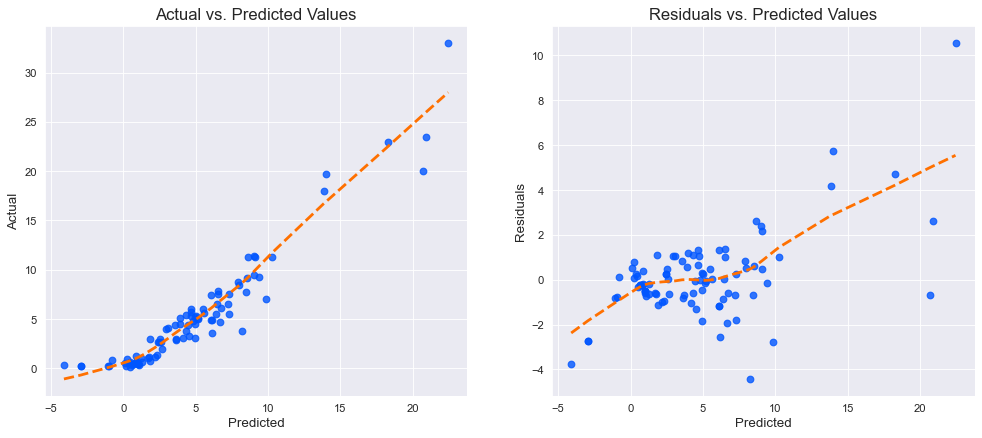

In [ ]:
linear_assumption(linear_reg, X_test_scaled, y_test)

The inspection of the plots shows that the linearity assumption is not satisfied.



Potential solutions:

Applying nonlinear transformations
Adding polynomial terms to some of the predictors

Step 8.7.2: Assumption 2 - Normality of Residuals
This assumes that the error terms of the model are normally distributed with a mean value of zero.

This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or presence of a few large outliers in data affecting our model.

A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals. When the residuals distribution significantly departs from Gaussian, confidence intervals may be too wide or too narrow. Technically, we can omit this assumption if we assume instead that the model equation is correct and our goal is to estimate the coefficients and generate predictions (in the sense of minimizing mean squared error). However, normally we are interested in making valid inferences from the model or estimating the probability that a given prediction error will exceed some threshold in a particular direction. To do so, the assumption about the normality of residuals must be satisfied.

To investigate this assumption we can check:

Check residuals histogram
Quantile-Quantile probability plot -> plotting the residuals vs the order of statistic
Anderson-Darling test

In [ ]:
def normal_errors_assumption(model, X_test, y_test, p_value_thresh=0.05):
    '''
    Function for inspecting the assumption of normality of residuals.
    '''
    df_results = residuals(model, X_test, y_test)

    # Anderson-Darling Test
    p_value = normal_ad(df_results['Residuals'])[1]

    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.')
    else:
        print('Residuals are normally distributed. Assumption satisfied.')


    # Residuals Histogram
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)

    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15,
                 color='#0055ff', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))


    # Q-Q Probability Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#509aff')
    ax[1].get_lines()[1].set_color('#ff7000')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])

    plt.show()


P-value from the test (below 0.05 generally means non-normal):   0.0
Residuals are not normally distributed. Assumption not satisfied.


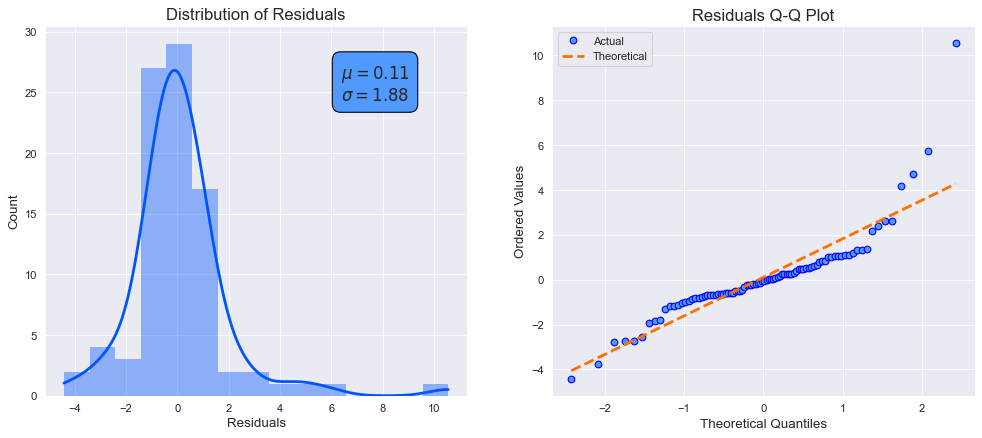

In [ ]:
normal_errors_assumption(linear_reg, X_test_scaled, y_test)


 QQ Plot of residuals:

The bow-shaped pattern of deviations from the diagonal implies that the residuals have excessive skewness.
The s-shaped pattern of deviations from the diagonal implies excessive kurtosis of the residuals (there are either too many or too few large errors in both directions.)
The non-zero mean value and the positive skewness of the residual distribution and the s-shaped pattern of the deviations in the QQ plot show that the residuals do not follow the Gaussian distribution.

Potential solutions:

Nonlinear transformation of target variable and features
Removing potential outliers

Step 8.7.3: Assumption 3 - No Perfect Multicollinearity
Multicollinearity occurs when the independent variables are correlated to each other. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison. The coefficient estimates can swing wildly based on which other independent variables are in the model and they become very sensitive to small changes in the model. Therefore, the estimates will be less precise and highly sensitive to particular sets of data. This increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant. On the other hand, the simultaneous changes of the independent variables can lead to large fluctuations of the target variable, which leads to the overfitting of the model and the reduction of its performance.

To detect multicolinearity, we can:

Use a heatmap of the correlation (step 7)
Examine the variance inflation factor (VIF)
Interpretation of VIF: The square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. The higher the value of VIF the higher correlation between this variable and the rest. A rule of thumb is that if VIF > 10 then multicollinearity is high.

In [ ]:
X['Fuel_Type_Diesel'] = X['Fuel_Type_Diesel']*1
X['Fuel_Type_Petrol'] = X['Fuel_Type_Petrol']*1
X['Seller_Type_Individual'] = X['Seller_Type_Individual']*1
X['Transmission_Manual'] = X['Transmission_Manual']*1

In [ ]:
def multicollinearity_assumption(X):
    ''''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])

    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')

    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [ ]:
multicollinearity_assumption(X)


1 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,vif
Age,8.15
Present_Price,5.14
Kms_Driven,5.34
Owner,1.10
Fuel_Type_Diesel,6.11
Fuel_Type_Petrol,16.86
Seller_Type_Individual,2.61
Transmission_Manual,9.59


There is possible multicollinearity for Fuel_Type_Petrol.



Potential solutions:

Using Regularization
Removing features with high values of VIF
Using PCA -> Reducing features to a smaller set of uncorrelated components

Step 8.7.4: Assumption 4 - No Autocorrelation of Residuals¶


This assumes no autocorrelation of the residuals. The presence of autocorrelation usually indicates that we are missing some information that should be captured by the model. Our model can be systematically biased by under-prediction or over-prediction under certain conditions. This could be the result of violating the linearity assumption.

To investigate this assumption we can perform a Durbin-Watson test to determine whether the correlation is positive or negative:

The test statistic always has a value between 0 and 4
Values of 1.5 < d < 2.5 means that there is no autocorrelation in the data
Values < 1.5 indicate positive autocorrelation, values > 2.5 indicate negative autocorrelation

In [ ]:
def autocorrelation_assumption(model, X_test, y_test):
    '''
    It assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then
    there is a pattern that is not explained because the current value is dependent on the previous value.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))

    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

In [ ]:
autocorrelation_assumption(linear_reg, X_test_scaled, y_test)


Durbin-Watson: 1.823
Little to no autocorrelation. Assumption satisfied. 



Durbin-Watson test indicates there is no autocorrelation.

Potential solution for fixing autocorrelation of residuals:

Adding interaction terms

Step 8.7.5: Assumption 5 - Homoscedasticity
Homoscedasticity means that the residuals doesn’t change across all the values of the target variable.

When residuals do not have constant variance, it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. The effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients.

To investigate if the residuals are homoscedastic, we can look at a plot of residuals vs. predicted values. The placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible.

In [ ]:
def homoscedasticity_assumption(model, X_test, y_test):
    """
    Homoscedasticity assumes that the residuals exhibit constant variance
    """
    print('The orange line should be flat:')
    df_results = residuals(model, X_test, y_test)

    fig = plt.figure(figsize=(6,6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    plt.axhline(y=0, color='#23bf00', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.show()

The orange line should be flat:


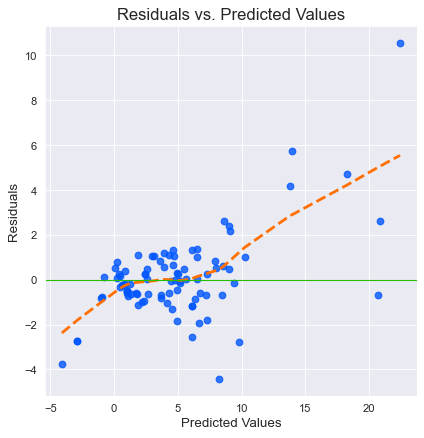

In [ ]:
homoscedasticity_assumption(linear_reg, X_test_scaled, y_test)


We can not see a fully uniform variance across our residuals because the orange line is not flat. The assumption is not satisfied.


Potential solutions:

Outlier removal
Appllying log transformation of independent variables
Applying polynomial regression


In the following:
To satisfy the multicollinearity assumption, we remove the Fuel_Type_Petrol feature.
Then, according to the pattern in the plot of the residuals vs. predicted values, we will use box-cox transformation on the entire dataset.
By applying polynomial regression, we will try to improve the satisfaction of homoscedasticity and normality of residuals.
Finally, we will use regularization to reduce the probability of the model to be overfit.
Drop Fuel_Type_Petrol:

In [ ]:
del df1['Fuel_Type_Petrol']


Step 8.8: Results Visualization
We compare the actual and predicted target values for the test data with the help of a bar plot:

In [ ]:
y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

In [ ]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

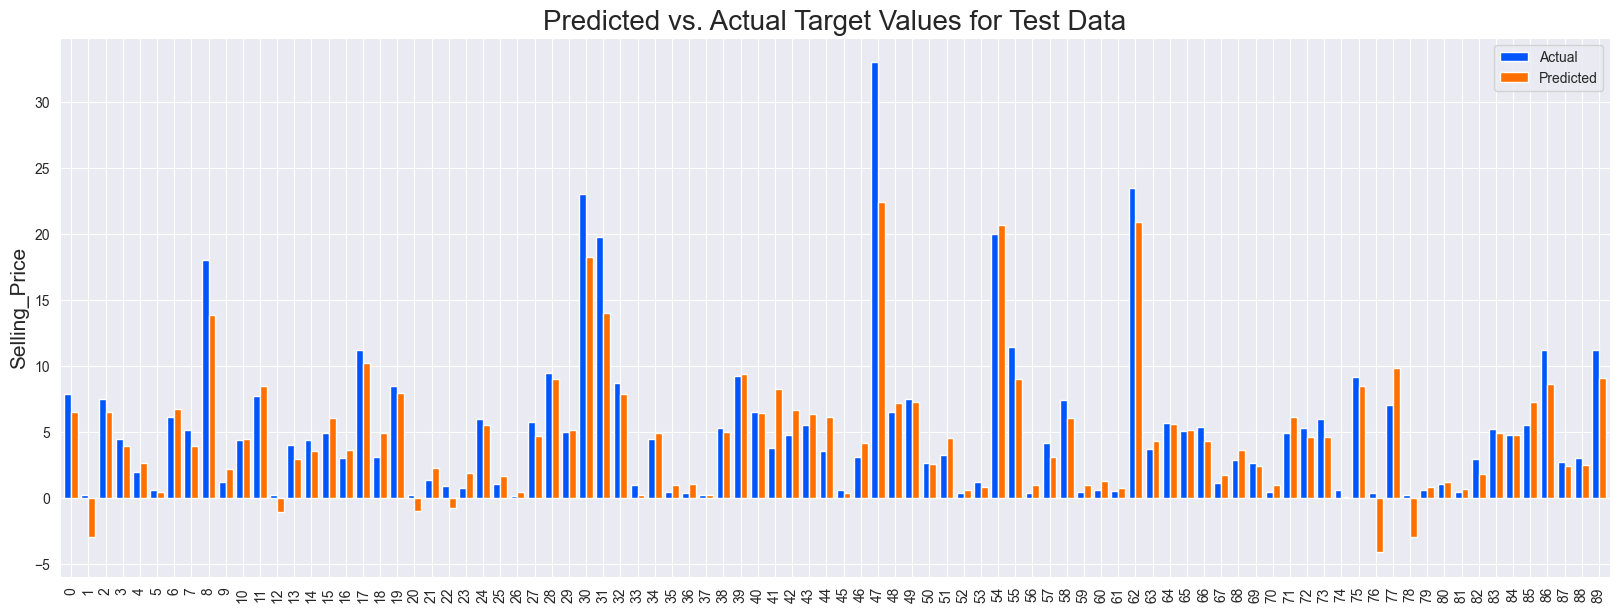

In [ ]:
compare_plot(df_comp)


The difference between the corresponding bars in the above bar plot shows the prediction error of the model on the test data. Also, out of 90 test samples, Selling_Price has been predicted negatively in 6 cases. A negative prediction for Selling_Price is disappointing.

Step 9: Apply Box-Cox Transformation:


In order to satisfy the regression assumptions, we apply the Box-Cox transformation on the whole dataset. The Box-Cox transformations change the shape of our data, making it more close to a normal distribution.

In order to prevent data leakage, the fitted lambda value for each feature is obtained from the training data set and then the transformation is applied to the both training and test data:



Step 9.1: Transform Training Data & Save Lambda Values¶


In [ ]:
fitted_lambda = pd.Series(np.zeros(len(df1.columns), dtype=np.float64), index=df1.columns)

y_train, fitted_lambda['Selling_Price'] = stats.boxcox(y_train+1)
for col in X_train.columns:
    X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col]+1)

fitted_lambda

Age                       -0.360231
Selling_Price             -0.035121
Present_Price              0.078725
Kms_Driven                 0.350131
Owner                    -30.152327
Fuel_Type_Diesel          -7.293622
Seller_Type_Individual    -2.570020
Transmission_Manual       14.351418
Fuel_Type_Petrol           6.887121
dtype: float64

Step 9.2: Transform Test Data Using Lambda Values¶


In [ ]:
y_test = stats.boxcox(y_test+1, fitted_lambda['Selling_Price'])
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1, fitted_lambda[col])

In [ ]:
y_train = pd.DataFrame(y_train, index=X_train.index, columns=['Selling_Price'])
y_test = pd.DataFrame(y_test, index=X_test.index, columns=['Selling_Price'])

X_boxcox = pd.concat([X_train, X_test])
y_boxcox = pd.concat([y_train, y_test])

df_boxcox = pd.concat([X_boxcox, y_boxcox], axis=1)
df_boxcox.sort_index(inplace=True)

del df_boxcox['Fuel_Type_Petrol']

As seen in Step 5.2, the distribution of continuous variables all had a lot of positive skewness. In the following, we can see the change in the shape of the distribution of these variables after applying Box-Cox transformation:

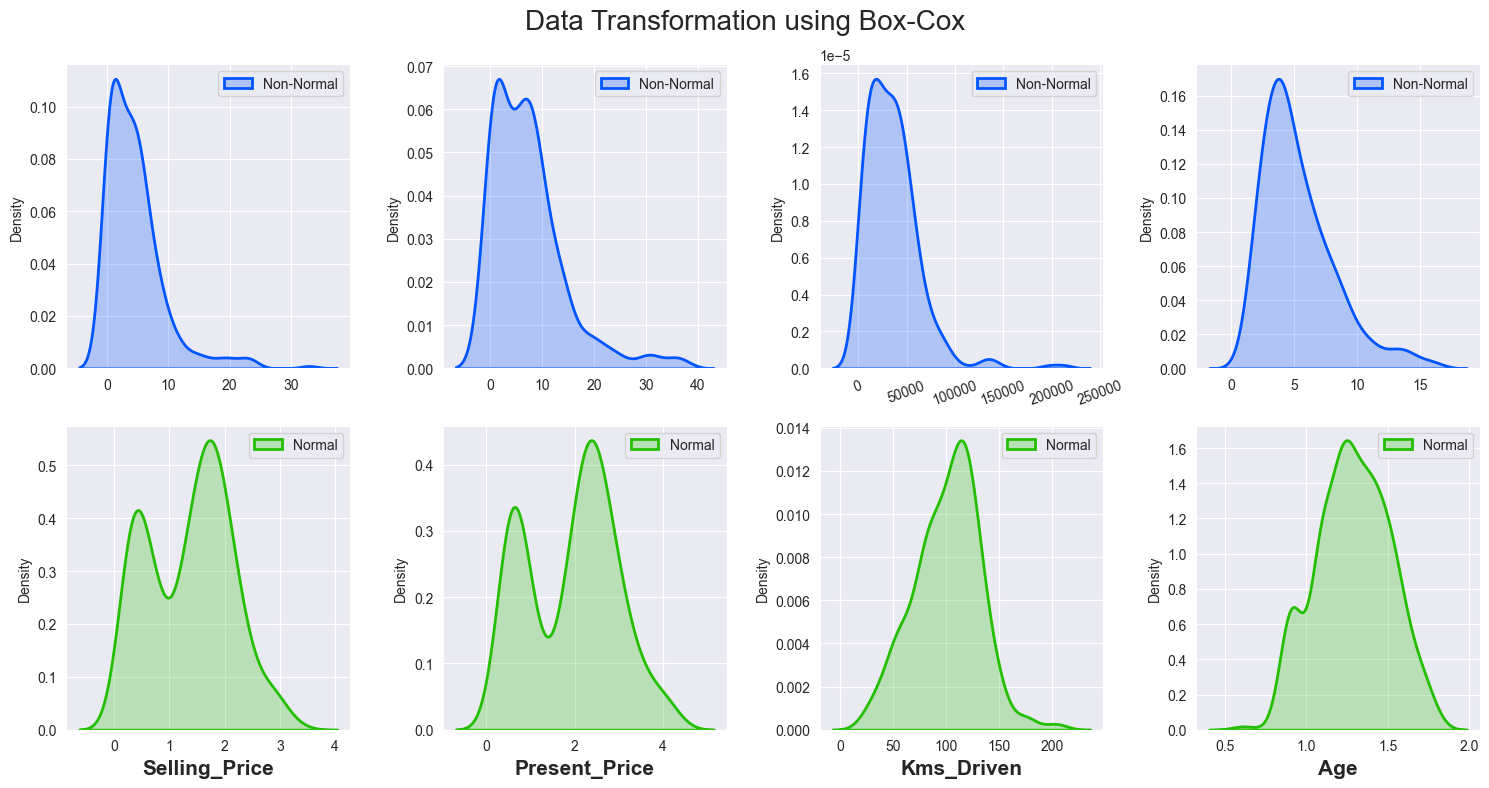

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(15,8), dpi=100)
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']

for i,col in enumerate(columns):
    sns.kdeplot(df1[col], label="Non-Normal", fill=True, color='#0055ff', linewidth=2, ax=ax[0,i])
    sns.kdeplot(df_boxcox[col], label="Normal", fill=True, color='#23bf00', linewidth=2, ax=ax[1,i])
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

As can be seen, the distribution of the variables is closer to the normal distribution after applying Box-Cox.



In [ ]:
X = df_boxcox.drop('Selling_Price', axis=1)
y = df_boxcox['Selling_Price']

Now box-cox transformation is applied on X and y. Next, we will add higher order features to the model.



Step 10: Build 2nd-order Polynomial Regression¶


In order to overcome under-fitting and meet linear regression assumptions, first we try to increase the complexity of the model by adding all of the second-order terms of the features

Step 10.1: Create 2nd-order Polynomial Features¶


In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head(5)

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Owner^2,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
0,1.320187,2.032688,98.846654,0.0,0.000000,0.0,1456.436732,1.742893,2.683528,130.496050,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.121208e+06
1,1.398824,2.587658,116.843776,0.0,0.136232,0.0,1456.436732,1.956709,3.619679,163.443905,...,0.0,0.0,0.0,0.0,0.018559,0.0,198.413584,0.0,0.0,2.121208e+06
2,0.907273,2.622591,60.223871,0.0,0.000000,0.0,1456.436732,0.823145,2.379406,54.639502,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.121208e+06
3,1.518024,1.749435,54.276845,0.0,0.000000,0.0,1456.436732,2.304398,2.655684,82.393575,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.121208e+06
4,1.320187,2.240043,116.305479,0.0,0.136232,0.0,1456.436732,1.742893,2.957275,153.544961,...,0.0,0.0,0.0,0.0,0.018559,0.0,198.413584,0.0,0.0,2.121208e+06


In [ ]:
poly_features_names = poly_features.get_feature_names_out(X.columns)
len(poly_features_names)

35

Step 10.2: Split Dataset to Training & Test Sets¶


In [ ]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [ ]:
print('X_poly_train shape: ', X_poly_train.shape)
print('X_poly_test shape: ', X_poly_test.shape)
print('y_poly_train shape: ', y_poly_train.shape)
print('y_poly_test shape: ',y_poly_test.shape)

X_poly_train shape:  (209, 35)
X_poly_test shape:  (90, 35)
y_poly_train shape:  (209,)
y_poly_test shape:  (90,)


Step 10.3: Scale Data using Standard Scaler¶


In [ ]:
scaler = StandardScaler()
scaler.fit(X_poly_train)

X_poly_train = scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

Step 10.4: Create Polynomial Regression Model using Linear Regression¶


In [ ]:
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

Step 10.5: Model Evaluation


2nd-order Polynomial Model Performance on Test Data:



In [ ]:
model_evaluation(polynomial_reg, X_poly_test, y_poly_test, 'Polynomial Reg. Test')


,Polynomial Reg. Test
MAE,0.088163
MSE,0.011432
RMSE,0.106920
R2-Score,0.981584


2nd-order Polynomial Model Performance on Training Data:



In [ ]:
model_evaluation(polynomial_reg, X_poly_train, y_poly_train, 'Polynomial Reg. Train')


,Polynomial Reg. Train
MAE,0.064327
MSE,0.006435
RMSE,0.080222
R2-Score,0.988170


As can be seen, using boxcox transformation and production of second-order features has improved the model performance greatly!

MAE: 1.199 -> 0.088

MSE: 3.715 -> 0.011

RMSE: 1.927 -> 0.107

R2 Score: %88.72 -> %98.16

The accuracy of the model on the training and test data are close to each other, so the model is not overfit.
The production of third-order and higher features was also tested, which caused the model to become overfit.

Step 10.6: Model Evaluation using Cross-Validation
By using cross-validation, we can be more confident in our estimation of the model evaluation metrics:

In [ ]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result2 = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result2['test_neg_mean_absolute_error']).mean()
MAE_std = (-result2['test_neg_mean_absolute_error']).std()
MSE_mean = (-result2['test_neg_mean_squared_error']).mean()
MSE_std = (-result2['test_neg_mean_squared_error']).std()
RMSE_mean = (-result2['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result2['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result2['test_r2'].mean()
R2_Score_std = result2['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,1.727669e+09,3.863186e+09
MSE,8.954522e+20,2.002292e+21
RMSE,1.221647e+10,2.731685e+10
R2-Score,-1.674845e+21,3.745066e+21


The accuracy obtained from the simple train test split is valid because it is close to the accuracy obtained from cross validation.

So far, we have a polynomial model consisting of 35 features with 98.16% r2-score. Lets check regression assumptions for this model.

Step 10.7: Assumptions Investigation
Step 10.7.1: Assumption 1 - Linearity

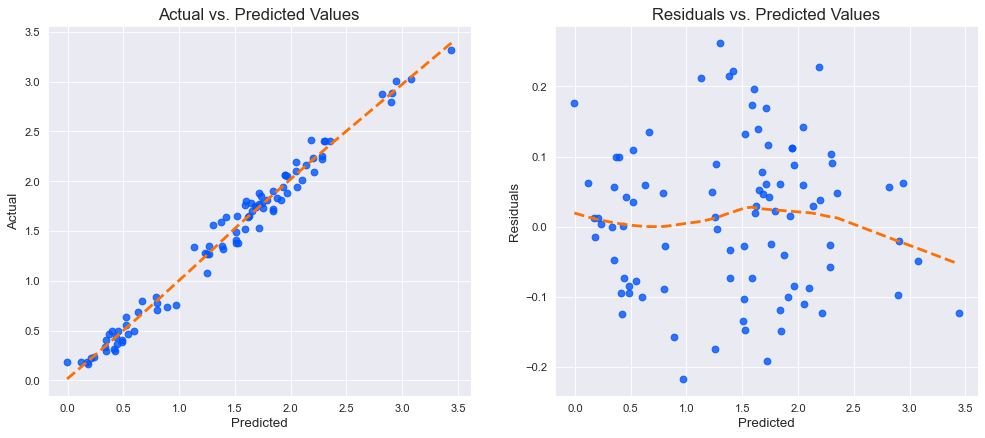

In [ ]:
linear_assumption(polynomial_reg, X_poly_test, y_poly_test)


Step 10.7.2: Assumption 2 - Normality of Residuals¶



P-value from the test (below 0.05 generally means non-normal):   0.450843
Residuals are normally distributed. Assumption satisfied.


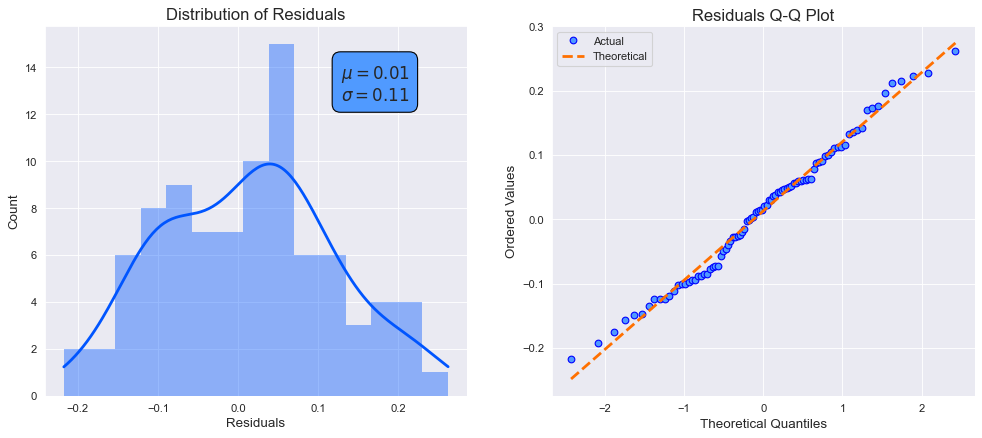

In [ ]:
normal_errors_assumption(polynomial_reg, X_poly_test, y_poly_test)


Step 10.7.3: Assumption 3 - No Perfect Multicollinearity¶


In [ ]:
warnings.simplefilter(action='ignore')
multicollinearity_assumption(X_poly).T

33 cases of possible multicollinearity.
28 cases of definite multicollinearity.
Assumption not satisfied.


,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Owner^2,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
vif,5900.61,1600.38,2718.65,inf,inf,inf,inf,2291.33,1982.97,2095.33,...,inf,2.91,22.29,194.47,inf,5.69,40.17,inf,139.2,inf


Step 10.7.4: Assumption 4 - No Autocorrelation of Residuals¶


In [ ]:
autocorrelation_assumption(polynomial_reg, X_poly_test, y_poly_test)


Durbin-Watson: 1.836
Little to no autocorrelation. Assumption satisfied. 



Step 10.7.5: Assumption 5 - Homoscedasticity¶


The orange line should be flat:


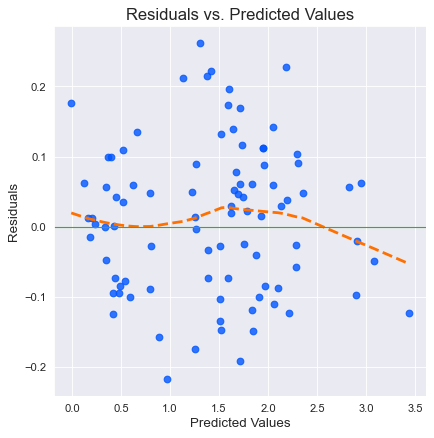

In [ ]:
homoscedasticity_assumption(polynomial_reg, X_poly_test, y_poly_test)


All regression assumptions are satisfied to a good extent except for multicollinearity. But in general, the polynomial model performs better than the linear model on this data set.

To reduce multicollinearity effects we can use Regularization. Regularized regression puts contraints on the magnitude of the coefficients and will progressively shrink them towards zero relative to the least-squares estimates. There are two types of regularization as follows:

L1 Regularization or Lasso Regularization
L2 Regularization or Ridge Regularization

Step 11: Ridge Regression
In L2 Regularization or Ridge Regularization, we add a penalty which is the sum of the squared values of weights on the loss function in order to push the estimated coefficients towards zero and not take more extreme values:

Loss function = OLS + alpha * (the sum of the square of coefficients)
In the above loss function, alpha is the tuning factor which has control over the strength of the penalty term. A small alpha value leads the model to overfit and a large alpha value leads the model to underfit. We use cross-validated ridge regression to tune alpha value:

Step 11.1: Split Dataset to Training & Test Sets¶


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)


Step 11.2: Scale Data using Standard Scaler¶


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Step 11.3: Build Ridge Regression Model¶


In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_cv_model = RidgeCV(alphas = alphas, cv = 3, scoring = 'neg_mean_squared_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=3, scoring='neg_mean_squared_error')

The alpha value that results in the smallest cross-validation MSE is:



In [ ]:
ridge_cv_model.alpha_


0.06164233697210317

Step 11.4: Ridge Model Evaluation


In [ ]:
model_evaluation(ridge_cv_model, X_test, y_test, 'Ridge Reg. Test')


,Ridge Reg. Test
MAE,0.088627
MSE,0.011710
RMSE,0.108213
R2-Score,0.981136


Ridge Model Performance on Training Data:



In [ ]:
model_evaluation(ridge_cv_model, X_train, y_train, 'Ridge Reg. Train')


,Ridge Reg. Train
MAE,0.065017
MSE,0.006550
RMSE,0.080929
R2-Score,0.987961


The accuracy of the model on the training and test data are close to each other, so the model is not overfit.
The Ridge model has almost the same accuracy as the polynomial model.

Step 11.5: Ridge Regression Coefficients¶


The Ridge Regression coefficients are:



In [ ]:
ridge_cv_model.coef_


array([ 0.36609183,  0.94219762,  0.09864623,  0.02309365, -0.07519781,
       -0.11418703, -0.06460863, -0.35432223, -0.43584563, -0.1923328 ,
        0.16766332,  0.03133492, -0.05567052,  0.05302022, -0.02505909,
       -0.05810145, -0.06927462,  0.15954693,  0.07028801,  0.14433495,
        0.01641319, -0.03374477,  0.07765899,  0.04524194, -0.02998582,
        0.02309365, -0.01012408, -0.08092617, -0.07668233, -0.07519781,
       -0.00316941, -0.03175677, -0.11418703,  0.11123274, -0.06460863])

As can be seen, L2 regularization allows weights to decay towards zero but not to zero.



Step 11.6: Ridge Model Assumptions Investigation


Step 11.6.1: Assumption 1 - Linearity¶


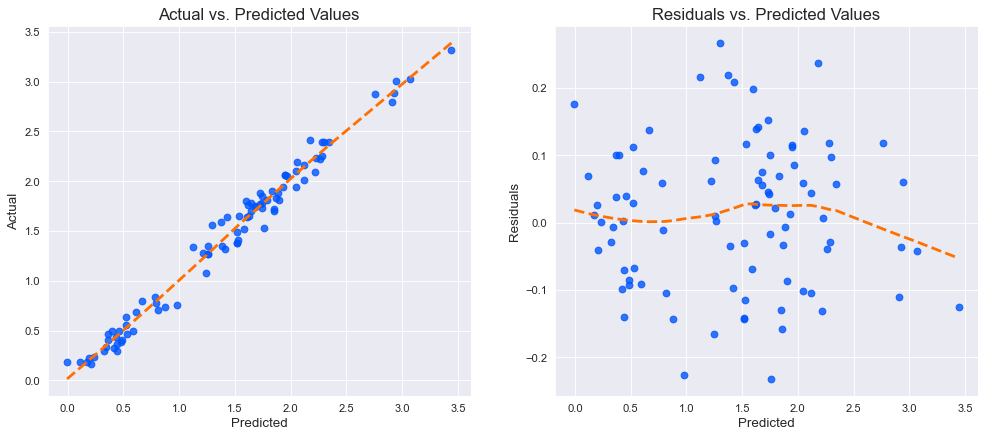

In [ ]:
linear_assumption(ridge_cv_model, X_test, y_test)


Step 11.6.2: Assumption 2 - Normality of Residuals



P-value from the test (below 0.05 generally means non-normal):   0.637709
Residuals are normally distributed. Assumption satisfied.


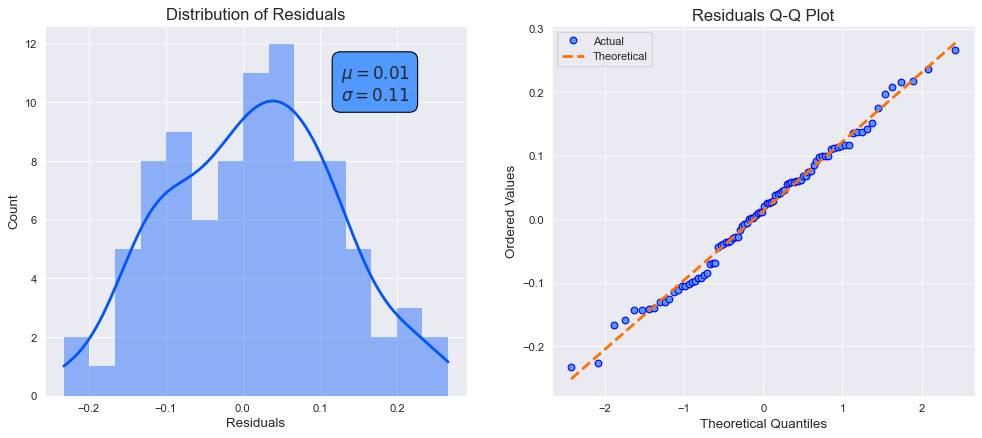

In [ ]:
normal_errors_assumption(ridge_cv_model, X_test, y_test)


In [ ]:
multicollinearity_assumption(X_poly).T


33 cases of possible multicollinearity.
28 cases of definite multicollinearity.
Assumption not satisfied.


,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Owner^2,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
vif,5900.61,1600.38,2718.65,inf,inf,inf,inf,2291.33,1982.97,2095.33,...,inf,2.91,22.29,194.47,inf,5.69,40.17,inf,139.2,inf


In [ ]:
autocorrelation_assumption(ridge_cv_model, X_test, y_test)


Durbin-Watson: 1.749
Little to no autocorrelation. Assumption satisfied. 



The orange line should be flat:


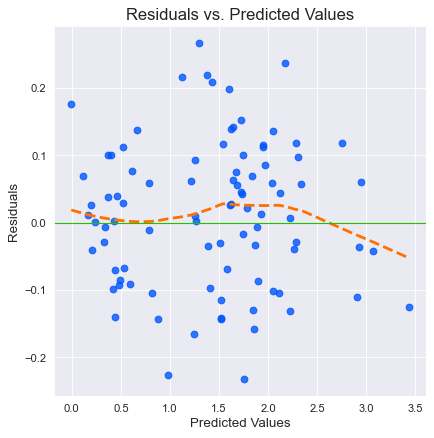

In [ ]:
homoscedasticity_assumption(ridge_cv_model, X_test, y_test)


As can be seen, the assumptions have improved slightly compared to the polynomial model.¶


Step 12: Lasso Regression


In L1 Regularization or Lasso Regularization, we add a penalty which is the sum of the absolute values of weights on the loss function in order to push the estimated coefficients towards zero:

Loss function = OLS + alpha * (the sum of the absolute of coefficients)
We again use cross-validated lasso regression to tune alpha value:



Step 12.1: Build Lasso Regression Model¶


In [ ]:
lasso_cv_model = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)


In [ ]:
lasso_cv_model.fit(X_train, y_train)


LassoCV(cv=3, eps=0.01, max_iter=10000)

In [ ]:
lasso_cv_model.alpha_


0.006881979800721571

Step 12.2: Lasso Model Evaluation on Test Data


In [ ]:
model_evaluation(lasso_cv_model, X_test, y_test, 'Lasso Reg. Test')


,Lasso Reg. Test
MAE,0.116568
MSE,0.021042
RMSE,0.145059
R2-Score,0.966102


In [ ]:
model_evaluation(lasso_cv_model, X_train, y_train, 'Lasso Reg. Train')


,Lasso Reg. Train
MAE,0.097111
MSE,0.014366
RMSE,0.119859
R2-Score,0.973592


The accuracy of the model on the training and test data are close to each other, so the model is not overfit.
The accuracy of the Lasso model has decreased slightly compared to the ridge model.

Step 12.3: Lasso Regression Coefficients


In [ ]:
lasso_coef = lasso_cv_model.coef_
lasso_coef

array([-0.        ,  0.60294926,  0.        , -0.        ,  0.        ,
       -0.10480454,  0.        , -0.11685201, -0.01226402, -0.10880579,
       -0.        ,  0.        ,  0.        ,  0.00765437,  0.        ,
       -0.        , -0.00784492,  0.07983492, -0.        ,  0.0062655 ,
       -0.        , -0.        ,  0.        ,  0.03806997,  0.01202733,
       -0.        , -0.        , -0.00863018,  0.00189986,  0.        ,
        0.01417074, -0.        , -0.03844947, -0.        ,  0.        ])

In [ ]:
lasso_coef = pd.DataFrame(lasso_cv_model.coef_, index=X_poly.columns, columns=['Lasso Coef.'])
lasso_coef = lasso_coef[lasso_coef['Lasso Coef.']!=0]
lasso_coef.T

,Present_Price,Seller_Type_Individual,Age^2,Age Present_Price,Age Kms_Driven,Age Transmission_Manual,Present_Price Owner,Present_Price Fuel_Type_Diesel,Present_Price Transmission_Manual,Kms_Driven Seller_Type_Individual,Kms_Driven Transmission_Manual,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual,Seller_Type_Individual^2
Lasso Coef.,0.602949,-0.104805,-0.116852,-0.012264,-0.108806,0.007654,-0.007845,0.079835,0.006265,0.03807,0.012027,-0.00863,0.0019,0.014171,-0.038449


L1 regularization allows weights to decay to zero.
In exchange for reducing the number of features from 35 to 15, the R2-score of the model has decreased from %98.16 to %96.61.

Step 12.4: Lasso Model Assumptions Investigation
Step 12.4.1: Assumption 1 - Linearity

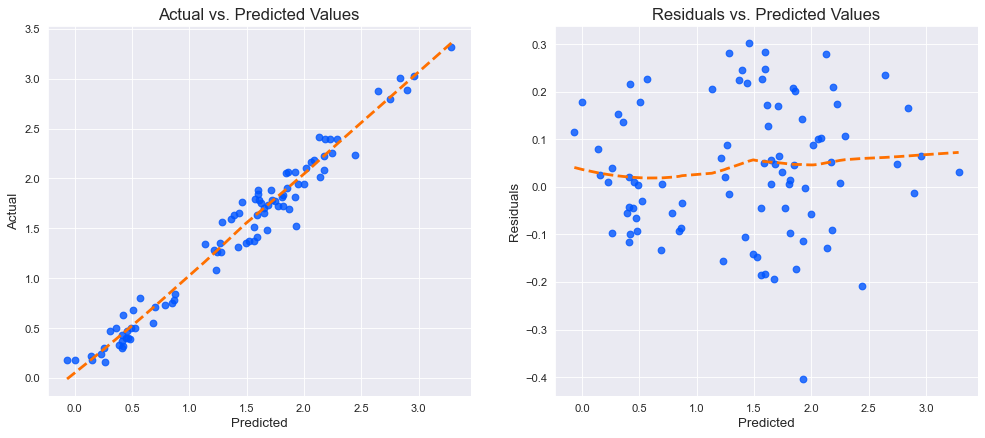

In [ ]:
linear_assumption(lasso_cv_model, X_test, y_test)


Step 12.4.2: Assumption 2 - Normality of Residuals¶



P-value from the test (below 0.05 generally means non-normal):   0.259964
Residuals are normally distributed. Assumption satisfied.


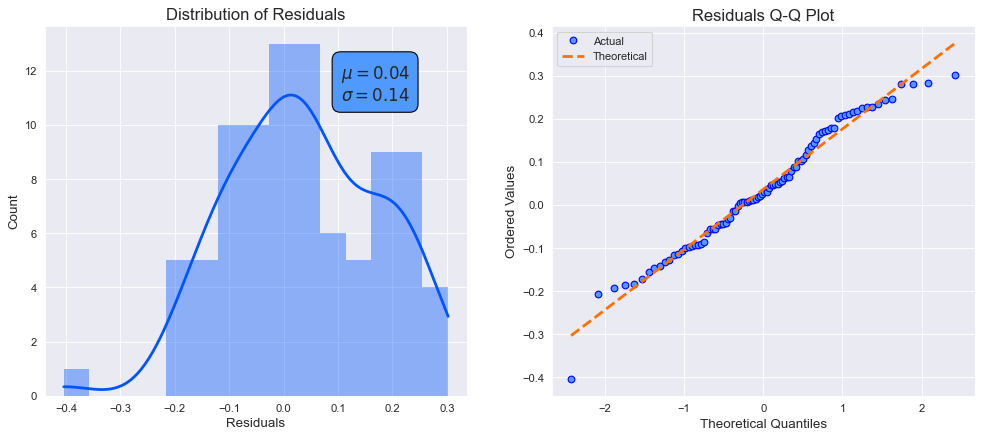

In [ ]:
normal_errors_assumption(lasso_cv_model, X_test, y_test)


Step 12.4.3: Assumption 3 - No Perfect Multicollinearity


In [ ]:
multicollinearity_assumption(X_poly[lasso_coef.index]).T


10 cases of possible multicollinearity.
7 cases of definite multicollinearity.
Assumption not satisfied.


,Present_Price,Seller_Type_Individual,Age^2,Age Present_Price,Age Kms_Driven,Age Transmission_Manual,Present_Price Owner,Present_Price Fuel_Type_Diesel,Present_Price Transmission_Manual,Kms_Driven Seller_Type_Individual,Kms_Driven Transmission_Manual,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual,Seller_Type_Individual^2
vif,64.45,inf,116.57,143.28,190.08,110.44,2.4,1.93,35.95,17.66,153.83,2.45,3.78,1.4,inf


Step 12.4.4: Assumption 4 - No Autocorrelation of Residuals¶


In [ ]:
autocorrelation_assumption(lasso_cv_model, X_test, y_test)


Durbin-Watson: 1.727
Little to no autocorrelation. Assumption satisfied. 



Step 12.4.5: Assumption 5 - Homoscedasticity¶


The orange line should be flat:


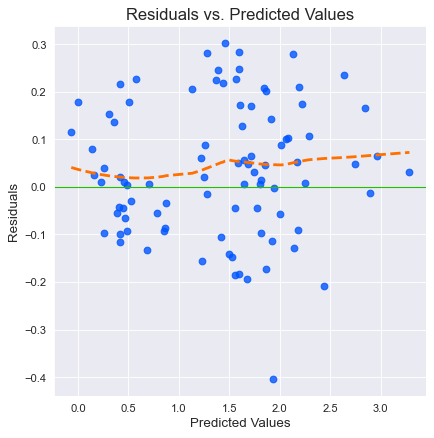

In [ ]:
homoscedasticity_assumption(lasso_cv_model, X_test, y_test)


Step 13: Elastic-Net Regression¶
Elastic-Net allows a balance of both L1 and L2 penalties, which can result in better performance than a model with either one or the other penalty on problems.

Loss function = OLS + [ alpha l1_ratio L1-norm ] + [ 0.5 alpha (1 - l1_ratio) * L2-norm ]
In addition to setting an alpha value, Elastic-Net also allows us to tune the l1-ratio parameter where l1-ratio = 0 corresponds to ridge and l1-ratio = 1 corresponds to lasso. We again use cross-validated Elastic-Net regression to tune hyperparameters:

In [ ]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, .998, 1],
                                eps=0.001, n_alphas=100, cv=3, max_iter=100000)

In [ ]:
elastic_cv_model.fit(X_train, y_train)


ElasticNetCV(cv=3, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 0.998, 1],
             max_iter=100000)

In [ ]:
elastic_cv_model.l1_ratio_


1.0

In [ ]:
elastic_cv_model.alpha_


0.001045999737177493

Step 13.2: Elastic-Net Model Evaluation


In [ ]:
model_evaluation(elastic_cv_model, X_test, y_test, 'Elastic-Net Reg. Test')


,Elastic-Net Reg. Test
MAE,0.103573
MSE,0.016286
RMSE,0.127617
R2-Score,0.973764


In [ ]:
model_evaluation(elastic_cv_model, X_train, y_train, 'Elastic-Net Reg. Train')


,Elastic-Net Reg. Train
MAE,0.071250
MSE,0.007932
RMSE,0.089063
R2-Score,0.985419


The accuracy of the model on the training and test data are close to each other, so the model is not overfited.
The accuracy of the Elastic-Net model has decreased slightly compared to Ridge model.


- Step 13.3: Elastic-Net Regression Coefficients
The ElasticNet Regression coefficients are:

In [ ]:
elastic_coef = elastic_cv_model.coef_
elastic_coef

array([ 1.14423834e-01,  9.18371586e-01,  4.83910270e-02,  0.00000000e+00,
       -0.00000000e+00, -1.02217643e-03, -0.00000000e+00, -1.11747086e-01,
       -3.51474737e-01, -1.83650062e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.25557851e-02,  6.54871719e-02,  3.24090364e-02,  1.96962494e-02,
       -0.00000000e+00, -0.00000000e+00,  3.82600360e-02,  5.83414020e-02,
        1.56930129e-02,  0.00000000e+00, -7.63248732e-04, -3.16703405e-02,
        2.62643653e-02, -0.00000000e+00,  0.00000000e+00, -2.69529006e-02,
       -1.64939808e-01, -0.00000000e+00, -3.49448369e-03])

In [ ]:
elastic_coef = pd.DataFrame(elastic_cv_model.coef_, index=X_poly.columns, columns=['ElasticNet Coef.'])
elastic_coef = elastic_coef[elastic_coef['ElasticNet Coef.']!=0]
elastic_coef.T

,Age,Present_Price,Kms_Driven,Seller_Type_Individual,Age^2,Age Present_Price,Age Kms_Driven,Present_Price Owner,Present_Price Fuel_Type_Diesel,Present_Price Seller_Type_Individual,Present_Price Transmission_Manual,Kms_Driven Fuel_Type_Diesel,Kms_Driven Seller_Type_Individual,Kms_Driven Transmission_Manual,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Transmission_Manual^2
ElasticNet Coef.,0.114424,0.918372,0.048391,-0.001022,-0.111747,-0.351475,-0.18365,-0.022556,0.065487,0.032409,0.019696,0.03826,0.058341,0.015693,-0.000763,-0.03167,0.026264,-0.026953,-0.16494,-0.003494


Step 13.4: Elastic-Net Model Assumptions Investigation¶


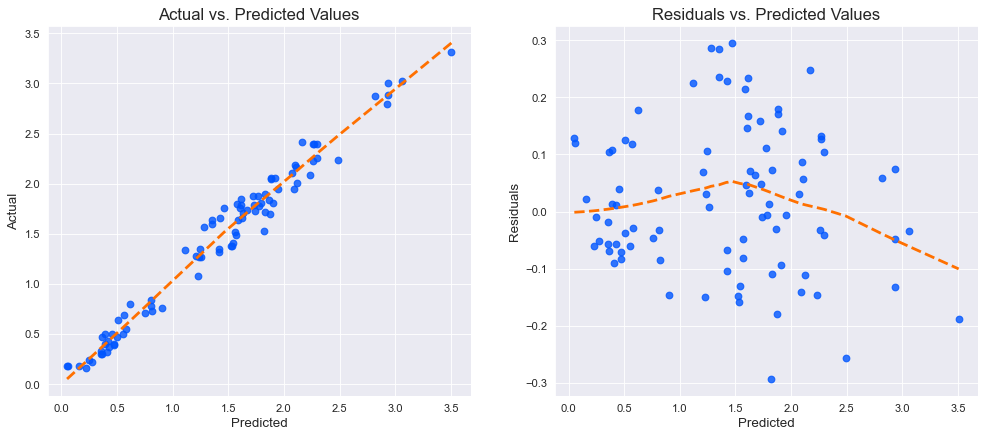

In [ ]:
linear_assumption(elastic_cv_model, X_test, y_test)



P-value from the test (below 0.05 generally means non-normal):   0.527837
Residuals are normally distributed. Assumption satisfied.


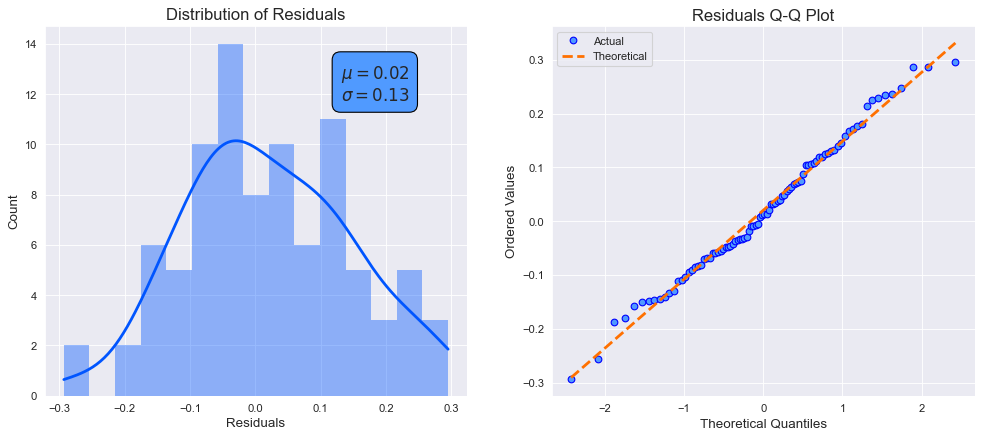

In [ ]:
normal_errors_assumption(elastic_cv_model, X_test, y_test)


In [ ]:
multicollinearity_assumption(X_poly[elastic_coef.index]).T


14 cases of possible multicollinearity.
9 cases of definite multicollinearity.
Assumption not satisfied.


,Age,Present_Price,Kms_Driven,Seller_Type_Individual,Age^2,Age Present_Price,Age Kms_Driven,Present_Price Owner,Present_Price Fuel_Type_Diesel,Present_Price Seller_Type_Individual,Present_Price Transmission_Manual,Kms_Driven Fuel_Type_Diesel,Kms_Driven Seller_Type_Individual,Kms_Driven Transmission_Manual,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Transmission_Manual^2
vif,1480.92,262.34,908.83,inf,1055.84,242.39,829.69,2.92,27.14,7.67,54.77,33.34,24.65,111.18,1.4,2.87,4.47,9.06,inf,78.11


In [ ]:
autocorrelation_assumption(elastic_cv_model, X_test, y_test)


Durbin-Watson: 1.741
Little to no autocorrelation. Assumption satisfied. 



The orange line should be flat:


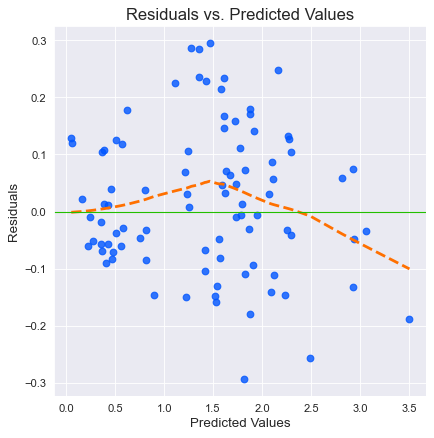

In [ ]:
homoscedasticity_assumption(elastic_cv_model, X_test, y_test)


The assumptions are fulfilled to a good extent, but the accuracy of the model is lower than the ridge model.¶

- Step 14: Build Higher Order Regularized Polynomial Model

Model overfitting occurs when the model learns well from train data, so it performs worst on the test data or any unseen data provided. One of the ways to avoid overfitting is to use regularization. In the overfit model, the coefficients are generally inflated. Regularization adds a penalty to the coefficients of the model and prevents them from being heavy. Therefore, when we use regularized regression models including ridge, lasso and elastic-net, it is possible to use higher order features in the model structure.

Step 14.1: Investigating Higher Order Regularized Polynomial Models¶


The following function produces high-order features from the 2nd order to the desired order and trains and evaluates regularized models on the set of features of each order and then it returns the r2-score and the number of features used by each regularized model in the form of two separate dataframes:

In [ ]:
def poly_check(degree, X, y):
    ridge_scores = []
    lasso_scores = []
    elasticnet_scores = []

    ridge_features = []
    lasso_features = []
    elasticnet_features = []

    for d in range(2,degree+1):
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        X_poly = poly_features.fit_transform(X)
        X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Ridge
        alphas = 10**np.linspace(10,-2,100)*0.5
        ridge_cv = RidgeCV(alphas = alphas, cv=3, scoring = 'neg_mean_squared_error')
        ridge_cv.fit(X_train, y_train)
        ridge_scores.append(ridge_cv.score(X_test,y_test))
        ridge_cols = ridge_cv.coef_[ridge_cv.coef_!=0].shape[0]
        ridge_features.append(ridge_cols)

        # Lasso
        lasso_cv = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)
        lasso_cv.fit(X_train, y_train)
        lasso_scores.append(lasso_cv.score(X_test,y_test))
        lasso_cols = lasso_cv.coef_[lasso_cv.coef_!=0].shape[0]
        lasso_features.append(lasso_cols)

        # Elastic-Net
        elastic_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, cv=3, max_iter=100000)
        elastic_cv.fit(X_train, y_train)
        elasticnet_scores.append(elastic_cv.score(X_test,y_test))
        elasticnet_cols = elastic_cv.coef_[elastic_cv.coef_!=0].shape[0]
        elasticnet_features.append(elasticnet_cols)

    scores = pd.DataFrame({'Ridge':ridge_scores, 'Lasso':lasso_scores, 'ElasticNet':elasticnet_scores}).round(4)
    scores = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), scores], axis=1)
    feature_num = pd.DataFrame({'Ridge':ridge_features, 'Lasso':lasso_features, 'ElasticNet':elasticnet_features})
    feature_num = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), feature_num], axis=1)
    return scores, feature_num

In [ ]:
scores, feature_num = poly_check(6, X, y)


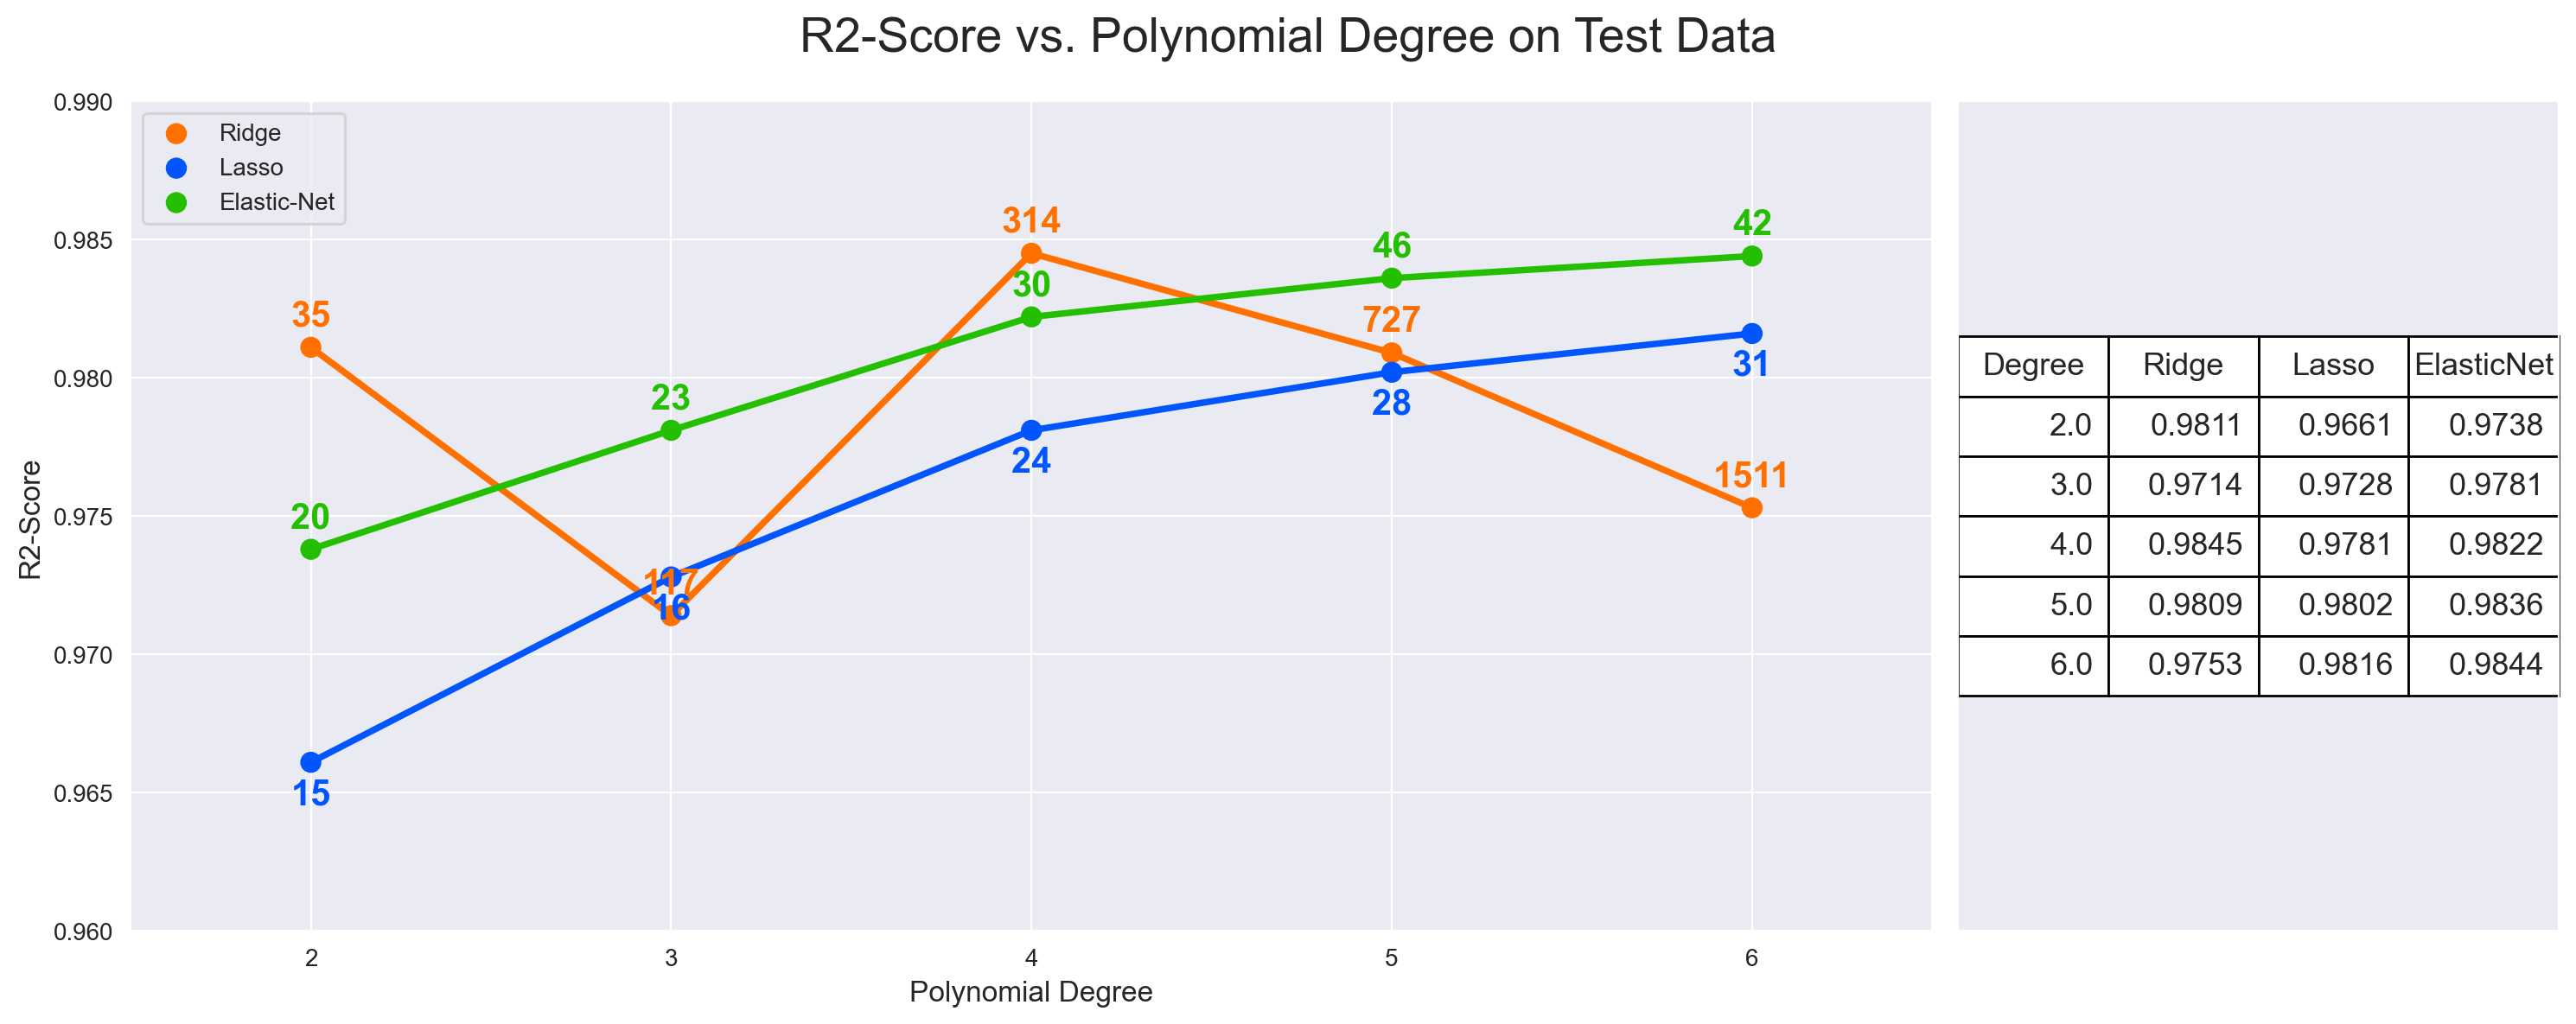

In [ ]:
# Plot1
fig, ax = plt.subplots(1, 2, figsize=(15,6), dpi=200, gridspec_kw={'width_ratios': [3, 1]})

sns.pointplot(x=scores['Degree'], y=scores['Ridge'], color='#ff7000', label='Ridge', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['Lasso'], color='#0055ff', label='Lasso', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['ElasticNet'], color='#23bf00', label='Elastic-Net', ax=ax[0])
ax[0].set_xlabel('Polynomial Degree', fontsize=12)
ax[0].set_ylabel('R2-Score', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(axis='x')
ax[0].set_ylim([0.96, 0.99])

# Annotate Points
for i,j,f in zip(scores['Degree']-2, scores['Ridge'], feature_num['Ridge']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#ff7000', weight='bold', fontsize=15)

for i,j,f in zip(scores['Degree']-2, scores['Lasso'], feature_num['Lasso']):
    ax[0].text(i, j-0.0015, str(f), ha='center', color='#0055ff', weight='bold', fontsize=15)

for i,j,f in zip(scores['Degree']-2, scores['ElasticNet'], feature_num['ElasticNet']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#23bf00', weight='bold', fontsize=15)

# Plot2
table = ax[1].table(cellText=scores.values, colLabels=scores.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(13)
ax[1].set_xticks([])
ax[1].set_yticks([])
table.scale(1, 2)

plt.suptitle('R2-Score vs. Polynomial Degree on Test Data', fontsize=20)
plt.tight_layout()
plt.show()

The graph on the left shows the trend of r2-score changes related to three regularized models including ridge, lasso and elastic-net along with the increase in the order of the used features.
The values annotated on the left graph are the number of features used in each model.
The table on the right contains r2-scores for each model.
An optimal model is one that not only uses fewer features, but also has a high r2-score.
In the situation where the simple polynomial model was overfit for the 3d-order model in the step 10, but the regularized models are not overfit for the features of orders higher than 2.

Step 14.2: Build the Optimal Model¶

Based on the previous graph, we choose the elastic-net model based on the 4th order polynomial model as the optimal model. By increasing the order from 4 onwards, the r2-score of the model is almost constant:



Step 14.2.1: Create 5th-order Polynomial Features


In [ ]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head()

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Fuel_Type_Diesel^2 Transmission_Manual^2,Fuel_Type_Diesel Seller_Type_Individual^3,Fuel_Type_Diesel Seller_Type_Individual^2 Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual Transmission_Manual^2,Fuel_Type_Diesel Transmission_Manual^3,Seller_Type_Individual^4,Seller_Type_Individual^3 Transmission_Manual,Seller_Type_Individual^2 Transmission_Manual^2,Seller_Type_Individual Transmission_Manual^3,Transmission_Manual^4
0,1.320187,2.032688,98.846654,0.0,0.000000,0.0,1456.436732,1.742893,2.683528,130.496050,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,4.499523e+12
1,1.398824,2.587658,116.843776,0.0,0.136232,0.0,1456.436732,1.956709,3.619679,163.443905,...,39367.950277,0.0,0.0,0.0,4.208765e+08,0.0,0.0,0.0,0.0,4.499523e+12
2,0.907273,2.622591,60.223871,0.0,0.000000,0.0,1456.436732,0.823145,2.379406,54.639502,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,4.499523e+12
3,1.518024,1.749435,54.276845,0.0,0.000000,0.0,1456.436732,2.304398,2.655684,82.393575,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,4.499523e+12
4,1.320187,2.240043,116.305479,0.0,0.136232,0.0,1456.436732,1.742893,2.957275,153.544961,...,39367.950277,0.0,0.0,0.0,4.208765e+08,0.0,0.0,0.0,0.0,4.499523e+12


Step 14.2.2: Split Dataset to Train & Test Sets¶


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
final_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, cv=4, max_iter=100000)

In [ ]:
final_model.fit(X_train, y_train)


ElasticNetCV(cv=4, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=100000)

In [ ]:
final_model.l1_ratio_


1.0

In [ ]:
final_model.alpha_


0.0006881979800721572

In [ ]:
model_evaluation(final_model, X_test, y_test, 'Final Model. Test')


,Final Model. Test
MAE,0.083486
MSE,0.010573
RMSE,0.102825
R2-Score,0.982967


In [ ]:
model_evaluation(final_model, X_train, y_train, 'Final Model. Train')


,Final Model. Train
MAE,0.061915
MSE,0.006108
RMSE,0.078152
R2-Score,0.988773


# 필수과제1
- 데이터를 공유 드릴 예정
- 해당 데이터를 가지고 오늘 업로드된 코드에 데이터 전처리, 탐색, 스케일링, 회귀분석, 규제, 기타 모든 과정을 한 번 정리해서
- 코드와 주석과 함께 정리해서 공유 부탁드립니다.
- 보충개념, box-cox 개념들 충분히 리서치 가능함, 리서치해서 스스로 공부해 보시고 같이 주석으로 처리해서 넣어놓기!

# 수료시점 맞춰서 개인 과제 또는 팀과제를 진행해야 합니다.
- 개인으로 해도 되고, 팀으로 해도 됩니다.
- 우수하게 올려주신 분은 -> 학술제 직접 간단하게 발표하시고 ( 프로젝트 ) 현직자 피드백 진행 예정
- 미리 시즌에 맞춰서 프로젝트 준비
- 프로젝트 주제는
    - 공모전을 진행해도 되고,
    - 수업시간에 배웠던 내용을 가지고 공공데이터나 다른 사이드 프로젝트로 진행해도 됩니다.
    - 꼭 공모전이 아니더라도 학술적인 내용으로 접근해도 됩니다.
    
- 꼭 발표를 하셔야 우수학회원에 가능하다는 것
- 자료는 정리해서 꼭 네이버 카페에 업로드 해야 합니다.
- 업로드한 PDF 파일과 코드 파일 같이 공유 주셔야 하고, 우수 과제로 선별이 되면 구체적인 현직자 피드백까지 제공하는 기회